In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
de_df = pd.read_csv("NT_comparison/DRG_cholinergic_species.tsv",sep="\t",index_col=0)

In [7]:
def volcanoplot(cell_results,
                x='logfoldchanges',
                y='-log10(p)',
                pvaladj='pvals_adj',
                txt_down='DOWN',
                txt_up='UP',
               highlight_genes=None,
               color_genes=None,
               color_genes_c='orange',
               save_path=None, max_y_value=300):

    #load libraries
    from adjustText import adjust_text
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    
    cell_results = cell_results.dropna()

    # Cap the -log10(p) values
    max_y_value = max(sorted(list(set(cell_results[y])),reverse=True)[1], max_y_value)
    cell_results[y] = cell_results[y].replace([np.inf], max_y_value)
    cell_results[y] = np.clip(cell_results[y], a_min=None, a_max=max_y_value)
    
    sig_cell_results = cell_results.loc[cell_results[pvaladj]<0.05,:]
    topdiff_genes = list(sig_cell_results.sort_values(by=pvaladj).index[0:10])

    markeredge_color = 'k'
    markeredge_width = 0.2
    plt.figure(figsize=(7,7))
    ax = plt.subplot()
    #plot all genes
    plt.plot(cell_results[x],
             cell_results[y],
             'o',c='grey',markeredgecolor =markeredge_color,markeredgewidth=markeredge_width)
    #plot significant genes in red
    plt.plot(sig_cell_results[x],
             sig_cell_results[y],
             'o',c='indianred',markeredgecolor =markeredge_color,markeredgewidth=markeredge_width)

    if color_genes:
        color_genes = [x for x in color_genes if x in cell_results.index]
        color_genes = color_genes
    else:
        color_genes = topdiff_genes

    if highlight_genes:
        highlight_genes = [x for x in highlight_genes if x in cell_results.index]
    else:
        highlight_genes = topdiff_genes

    #plot color genes
    [plt.plot(cell_results.loc[gene,x], cell_results.loc[gene,y],
              'o',c=color_genes_c,markeredgecolor =markeredge_color,markeredgewidth=markeredge_width) for gene in color_genes]

    #add text to highlight genes
    texts = [plt.text(cell_results.loc[gene,x], 
                      cell_results.loc[gene,y],
                      '%s' %gene, 
                      ha='center', va='center',
                      zorder=10) for gene in highlight_genes]
    adjust_text(texts,
                arrowprops=dict(arrowstyle='-', color='k',zorder=1),
                draw_lines=True)

    #set limits
    ymin = ax.get_ylim()[0]
    ymax = ax.get_ylim()[1]
    plt.vlines(x=0,ymin=ymin,ymax=ymax,linestyles='--',colors='b')
    plt.ylim([ymin,ymax])
    plt.annotate(xy=(0,1.05),xycoords='axes fraction',text=txt_down,fontsize=16)
    plt.annotate(xy=(0.755,1.05),xycoords='axes fraction',text=txt_up,fontsize=16)
    plt.xlabel('logFC',fontsize=20)
    plt.ylabel('-log10(p_val)',fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    if save_path:
        plt.savefig(save_path,dpi=350,bbox_inches='tight',pad_inches=0)
        
    plt.show()
    plt.close()

In [8]:
def volcanoplot(cell_results,
                x='logfoldchanges',
                y='-log10(p)',
                pvaladj='pvals_adj',
                txt_down='DOWN',
                txt_up='UP',
               highlight_genes=None,
               color_genes=None,
               color_genes_c='orange',
               save_path=None):
    from adjustText import adjust_text
    import matplotlib as mpl
    import matplotlib.pyplot as plt


In [9]:
def volcanoplot(cell_results,
                x='logfoldchanges',
                y='-log10(p)',
                pvaladj='pvals_adj',
                txt_down='DOWN',
                txt_up='UP',
                highlight_genes=None,
                color_genes=None,
                color_genes_c='orange',
                sig_color = 'indianred',
                dot_color='grey',
                save_path=None,
                show_annotations=True,
                header_annotations=True,
                text_edge_color='white',  # Edge color for text
                text_edge_width=2,  # Edge width for text
                max_y_value=300):
    from adjustText import adjust_text
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.patheffects import withStroke

    # Ensure no NaN values in the dataframe
    cell_results = cell_results.dropna()

    # Cap the -log10(p) values
    max_y_value = max(sorted(list(set(cell_results[y])), reverse=True)[1], max_y_value)
    cell_results[y] = cell_results[y].replace([np.inf], max_y_value)
    cell_results[y] = np.clip(cell_results[y], a_min=None, a_max=max_y_value)

    # Filter significant results
    sig_cell_results = cell_results[cell_results[pvaladj] < 0.05]

    # Determine top differentially expressed genes
    topdiff_genes = sig_cell_results.sort_values(by=pvaladj).head(10).index.tolist()

    plt.figure(figsize=(7, 7))  # Adjusted figure size for better visibility
    ax = plt.gca()

    markeredge_color = 'k'
    markeredge_width = 0.2

    # Plot all genes
    plt.scatter(cell_results[x], cell_results[y], c=dot_color, edgecolor=markeredge_color, s=60, alpha=0.5, label='All Genes')

    # Plot significant genes
    plt.scatter(sig_cell_results[x], sig_cell_results[y], c=sig_color, edgecolor=markeredge_color, s=60, alpha=0.75, label='Significant Genes')

    # Define genes to be highlighted and colored
    if color_genes:
        color_genes = [gene for gene in color_genes if gene in cell_results.index]
    else:
        color_genes = topdiff_genes

    if highlight_genes:
        highlight_genes = [gene for gene in highlight_genes if gene in cell_results.index]
        highlight_genes = cell_results.loc[highlight_genes].sort_values(by=pvaladj).head(10).index.tolist()
    else:
        highlight_genes = topdiff_genes

    # Plot color-coded genes
    plt.scatter(cell_results.loc[color_genes, x], cell_results.loc[color_genes, y],
                c=color_genes_c, edgecolor=markeredge_color, s=80, label='Color Genes')

    if show_annotations:
        # Prepare text annotations with a white outline
        texts = []
        outline_effect = withStroke(linewidth=text_edge_width, foreground=text_edge_color)
        for gene in highlight_genes:
            x_pos = cell_results.loc[gene, x]
            y_pos = cell_results.loc[gene, y]
            text = plt.text(x_pos, y_pos, gene, ha='center', va='center', fontsize=16,
                            color='black', path_effects=[outline_effect],zorder=10)  # Apply white outline
            texts.append(text)

        # Adjust text to prevent overlap, with lines connecting text to points
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='k', zorder=1), draw_lines=True)

    if header_annotations:
        # Adding text annotations for DOWN and UP with a white outline
        outline_effect = withStroke(linewidth=text_edge_width, foreground=text_edge_color)
        plt.annotate(txt_down, xy=(0, 1.05), xycoords='axes fraction', fontsize=18, color='blue', ha='left', va='top',
                     path_effects=[outline_effect])  # Apply white outline
        plt.annotate(txt_up, xy=(0.755, 1.05), xycoords='axes fraction', fontsize=18, color='blue', ha='left', va='top',
                     path_effects=[outline_effect])  # Apply white outline

    # Set dynamic x-axis limits based on data
    xlim_min = cell_results[x].min() - 1  # Adding some padding
    xlim_max = cell_results[x].max() + 1  # Adding some padding
    plt.xlim([xlim_min, xlim_max])

    # Custom x-axis ticks
    ticks = [-20, -10, 0, 10, 20]
    ticks = [tick for tick in ticks if xlim_min <= tick <= xlim_max]  # Ensure the ticks are within the x-axis limits
    plt.xticks(ticks, fontsize=20)

    # Add plot decorations
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

    plt.xlabel('logFC', fontsize=24)
    plt.ylabel('-log10(p-value)', fontsize=24)
    plt.yticks(fontsize=20)

    # Adjust the y-axis limit based on the max value
    ymin, ymax = ax.get_ylim()
    plt.ylim([ymin, max_y_value*1.075])

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=350, bbox_inches='tight', pad_inches=0)

    plt.show()
    plt.close()


In [10]:
de_df_iNeurons = de_df.loc[de_df['group']=='iNeurons'].copy()
de_df_iNeurons['-log10(p)'] = -np.log10(de_df_iNeurons['pvals'])
#de_df_iNeurons['signed_pval'] = 

/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
de_df_iNeurons.index = de_df_iNeurons['names']

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


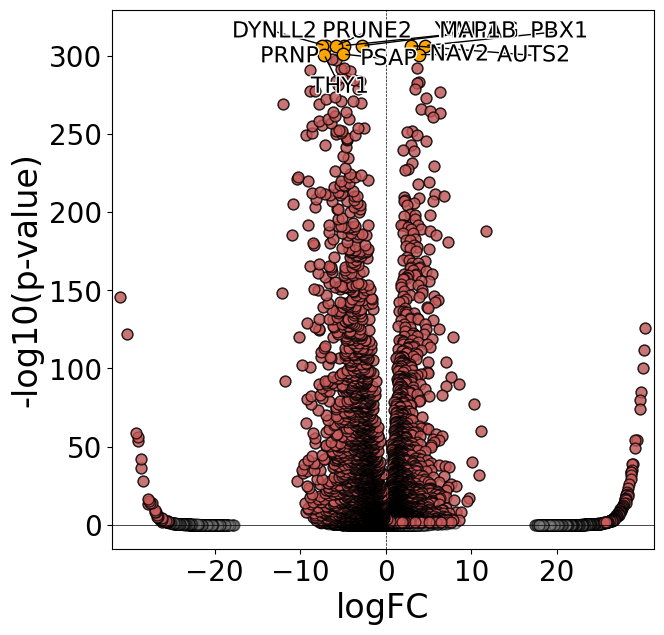

In [12]:
volcanoplot(de_df_iNeurons,
           x='logfoldchanges',
           y='-log10(p)',
           pvaladj='pvals_adj',header_annotations=False)

In [22]:
de_NT_files = !ls NT_comparison/*gic_species.tsv

In [23]:
len(de_NT_files)

20

In [24]:
def volcanoplot_multi(dataframes,  # A list of dataframes
                x='logfoldchanges',
                y='-log10(p)',
                pvaladj='pvals_adj',
                txt_down='DOWN',
                txt_up='UP',
                highlight_genes=None,
                color_genes=None,
                save_path=None,
                show_annotations=True,
                header_annotations=True,
                text_edge_color='white',  # Edge color for text
                text_edge_width=2,  # Edge width for text
                max_y_value=300,
                colors=None):  # List of colors for each dataframe
    from adjustText import adjust_text
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.patheffects import withStroke
    
    # Ensure we have the same number of colors as dataframes
    if colors is None:
        colors = ['grey', 'indianred', 'blue', 'green', 'purple']
    assert len(dataframes) <= len(colors), "Not enough colors provided for the number of dataframes."

    plt.figure(figsize=(7, 7))  # Adjusted figure size
    ax = plt.gca()

    markeredge_color = 'k'
    markeredge_width = 0.2

    # Iterate through each dataframe and plot its results
    for i, cell_results in enumerate(dataframes):
        cell_results = cell_results.dropna()

        # Cap the -log10(p) values
        max_y_value = max(sorted(list(set(cell_results[y])), reverse=True)[1], max_y_value)
        cell_results[y] = cell_results[y].replace([np.inf], max_y_value)
        cell_results[y] = np.clip(cell_results[y], a_min=None, a_max=max_y_value)

        # Filter significant results
        sig_cell_results = cell_results[cell_results[pvaladj] < 0.05]

        # Plot all genes for the current dataframe
        plt.scatter(cell_results[x], cell_results[y], c=colors[i], edgecolor=markeredge_color, s=60, alpha=0.5, label=f'Dataframe {i+1} All Genes')

        # Plot significant genes for the current dataframe
        plt.scatter(sig_cell_results[x], sig_cell_results[y], c=colors[i], edgecolor=markeredge_color, s=60, alpha=0.75, label=f'Dataframe {i+1} Significant Genes')

    if show_annotations:
        texts = []
        outline_effect = withStroke(linewidth=text_edge_width, foreground=text_edge_color)

        # Plot annotations for each dataframe
        for cell_results in dataframes:
            topdiff_genes = cell_results.sort_values(by=pvaladj).head(10).index.tolist()

            if highlight_genes:
                highlight_genes = [gene for gene in highlight_genes if gene in cell_results.index]
                highlight_genes = cell_results.loc[highlight_genes].sort_values(by=pvaladj).head(10).index.tolist()
            else:
                highlight_genes = topdiff_genes

            for gene in highlight_genes:
                x_pos = cell_results.loc[gene, x]
                y_pos = cell_results.loc[gene, y]
                text = plt.text(x_pos, y_pos, gene, ha='center', va='center', fontsize=16,
                                color='black', path_effects=[outline_effect])  # Apply white outline
                texts.append(text)

        # Adjust text to prevent overlap
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='k', zorder=1), draw_lines=True)

    if header_annotations:
        # Adding text annotations for DOWN and UP with a white outline
        outline_effect = withStroke(linewidth=text_edge_width, foreground=text_edge_color)
        plt.annotate(txt_down, xy=(0, 1.05), xycoords='axes fraction', fontsize=18, color='blue', ha='left', va='top',
                     path_effects=[outline_effect])  # Apply white outline
        plt.annotate(txt_up, xy=(0.755, 1.05), xycoords='axes fraction', fontsize=18, color='blue', ha='left', va='top',
                     path_effects=[outline_effect])  # Apply white outline

    # Set x-axis limits
    xlim_min = min([df[x].min() for df in dataframes]) - 1
    xlim_max = max([df[x].max() for df in dataframes]) + 1
    plt.xlim([xlim_min, xlim_max])

    # Custom x-axis ticks
    ticks = [-5, 0, 5]
    ticks = [tick for tick in ticks if xlim_min <= tick <= xlim_max]  # Ensure the ticks are within the x-axis limits
    plt.xticks(ticks, fontsize=20)

    # Add plot decorations
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

    plt.xlabel('logFC', fontsize=24)
    plt.ylabel('-log10(p-value)', fontsize=24)
    plt.yticks(fontsize=20)

    # Adjust the y-axis limit based on the max value
    ymin, ymax = ax.get_ylim()
    plt.ylim([ymin, max_y_value])

    # Add a legend for clarity
    plt.legend(loc='upper right', fontsize=12)

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=350, bbox_inches='tight', pad_inches=0)

    plt.show()
    plt.close()


In [25]:
def volcanoplot_multi(dataframes,  # A list of dataframes
                x='logfoldchanges',
                y='-log10(p)',
                pvaladj='pvals_adj',
                txt_down='DOWN',
                txt_up='UP',
                highlight_genes=None,
                color_genes=None,
                save_path=None,
                show_annotations=True,
                header_annotations=True,
                text_edge_color='white',  # Edge color for text
                text_edge_width=2,  # Edge width for text
                max_y_value=300,
                colors=None,  # List of colors for each dataframe
                bg_color_dots='grey',
                labels=None):  # Optional list of labels for each dataframe
    from adjustText import adjust_text
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.patheffects import withStroke
    import random
    
    # Ensure we have the same number of colors as dataframes
    if colors is None:
        colors = ['grey', 'indianred', 'blue', 'green', 'purple']
    assert len(dataframes) <= len(colors), "Not enough colors provided for the number of dataframes."

    # Assign labels if not provided
    if labels is None:
        labels = [f'df{i+1}' for i in range(len(dataframes))]

    assert len(dataframes) == len(labels), "The number of labels must match the number of dataframes."

    plt.figure(figsize=(7, 7))  # Adjusted figure size
    ax = plt.gca()

    markeredge_color = 'k'
    markeredge_width = 0.2

    texts = []  # This will hold all the text objects for adjust_text

    # Iterate through each dataframe and plot its results
    for i, (cell_results, label) in enumerate(zip(dataframes, labels)):
        cell_results = cell_results.dropna()

        # Cap the -log10(p) values
        max_y_value = max(sorted(list(set(cell_results[y])), reverse=True)[1], max_y_value)
        cell_results[y] = cell_results[y].replace([np.inf], max_y_value)
        cell_results[y] = np.clip(cell_results[y], a_min=None, a_max=max_y_value)

        # Filter significant results
        sig_cell_results = cell_results[cell_results[pvaladj] < 0.05]

        # Plot all genes for the current dataframe
        plt.scatter(cell_results[x], cell_results[y], c=bg_color_dots, edgecolor=markeredge_color, s=60, alpha=0.5)

        # Plot significant genes for the current dataframe
        plt.scatter(sig_cell_results[x], sig_cell_results[y], c=colors[i], edgecolor=markeredge_color, s=60, alpha=0.75)

        # Determine top 3 differentially expressed genes
        topdiff_genes = sig_cell_results.sort_values(by=pvaladj).head(3).index.tolist()

        if highlight_genes:
            highlight_genes = [gene for gene in highlight_genes if gene in cell_results.index]
            highlight_genes = cell_results.loc[highlight_genes].sort_values(by=pvaladj).head(3).index.tolist()
        else:
            highlight_genes = topdiff_genes

        # Annotate the top 3 genes with labels
        outline_effect = withStroke(linewidth=text_edge_width, foreground=text_edge_color)
        for gene in highlight_genes:
            x_pos = cell_results.loc[gene, x]
            y_pos = cell_results.loc[gene, y]
            text_label = f"{gene} ({label})"  # Add the label next to the gene name
            text = plt.text(x_pos, y_pos, text_label, ha='center', va='center', fontsize=12,
                            color='black', path_effects=[outline_effect])  # Apply white outline
            texts.append(text)

    if show_annotations:
        # Adjust text to prevent overlap across all dataframes
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='k', zorder=1), draw_lines=True)

    if header_annotations:
        # Adding text annotations for DOWN and UP with a white outline
        outline_effect = withStroke(linewidth=text_edge_width, foreground=text_edge_color)
        plt.annotate(txt_down, xy=(0, 1.05), xycoords='axes fraction', fontsize=18, color='blue', ha='left', va='top',
                     path_effects=[outline_effect])  # Apply white outline
        plt.annotate(txt_up, xy=(0.755, 1.05), xycoords='axes fraction', fontsize=18, color='blue', ha='left', va='top',
                     path_effects=[outline_effect])  # Apply white outline

    # Set x-axis limits
    xlim_min = min([df[x].min() for df in dataframes]) - 1
    xlim_max = max([df[x].max() for df in dataframes]) + 1
    plt.xlim([xlim_min, xlim_max])

    # Custom x-axis ticks
    ticks = [-20, -10, 0, 10, 20]
    ticks = [tick for tick in ticks if xlim_min <= tick <= xlim_max]  # Ensure the ticks are within the x-axis limits
    plt.xticks(ticks, fontsize=20)

    # Add plot decorations
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

    plt.xlabel('logFC', fontsize=24)
    plt.ylabel('-log10(p-value)', fontsize=24)
    plt.yticks(fontsize=20)

    # Adjust the y-axis limit based on the max value
    ymin, ymax = ax.get_ylim()
    plt.ylim([ymin, max_y_value])

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=350, bbox_inches='tight', pad_inches=0)

    plt.show()
    plt.close()


In [26]:
def volcanoplot_multi(dataframes,  # A list of dataframes
                      x='logfoldchanges',
                      y='-log10(p)',
                      pvaladj='pvals_adj',
                      txt_down='DOWN',
                      txt_up='UP',
                      highlight_genes=None,
                      color_genes=None,
                      save_path=None,
                      show_annotations=True,
                      header_annotations=True,
                      text_edge_color='white',  # Edge color for text
                      text_edge_width=2,  # Edge width for text
                      max_y_value=300,
                      colors=None,  # List of colors for each dataframe
                      bg_color_dots='grey',
                      labels=None):  # Optional list of labels for each dataframe
    from adjustText import adjust_text
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.patheffects import withStroke
    import matplotlib.gridspec as gridspec

    # Ensure we have the same number of colors as dataframes
    if colors is None:
        colors = ['gold', 'indianred', 'blue', 'green', 'purple','brown','lime','cyan']
    assert len(dataframes) <= len(colors), "Not enough colors provided for the number of dataframes."

    # Assign labels if not provided
    if labels is None:
        labels = [f'df{i+1}' for i in range(len(dataframes))]

    assert len(dataframes) == len(labels), "The number of labels must match the number of dataframes."

    # Create a figure with a GridSpec layout
    num_plots = len(dataframes)
    fig = plt.figure(figsize=(7,2 * num_plots))
    gs = gridspec.GridSpec(num_plots, 1)

    markeredge_color = 'k'
    markeredge_width = 0.2

    # Iterate through each dataframe and plot its results
    for i, (cell_results, label) in enumerate(zip(dataframes, labels)):
        ax = fig.add_subplot(gs[i])
        cell_results = cell_results.dropna()

        # Cap the -log10(p) values
        max_y_value = max(sorted(list(set(cell_results[y])), reverse=True)[1], max_y_value)
        cell_results[y] = cell_results[y].replace([np.inf], max_y_value)
        cell_results[y] = np.clip(cell_results[y], a_min=None, a_max=max_y_value)

        # Filter significant results
        sig_cell_results = cell_results[cell_results[pvaladj] < 0.05]

        # Plot all genes for the current dataframe
        ax.scatter(cell_results[x], cell_results[y], c=bg_color_dots, edgecolor=markeredge_color, s=20, alpha=0.5)

        # Plot significant genes for the current dataframe
        ax.scatter(sig_cell_results[x], sig_cell_results[y], c=colors[i], edgecolor=markeredge_color, s=20, alpha=0.75)

        # Set titles and labels
        ax.set_title(f"{label} Volcano Plot", fontsize=16)
        ax.set_xlabel('logFC', fontsize=12)
        ax.set_ylabel('-log10(p-value)', fontsize=12)

        # Set x-axis limits
        xlim_min = min([df[x].min() for df in dataframes]) - 1
        xlim_max = max([df[x].max() for df in dataframes]) + 1
        ax.set_xlim([xlim_min, xlim_max])

        # Custom x-axis ticks
        ticks = [-30, -20, -10, 0, 10, 20, 30]
        ticks = [tick for tick in ticks if xlim_min <= tick <= xlim_max]  # Ensure the ticks are within the x-axis limits
        ax.set_xticks(ticks)
        ax.tick_params(axis='both', labelsize=10)

        # Add plot decorations
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linestyle='--', linewidth=0.5)

        # Adjust y-axis limit based on the max value
        ymin, ymax = ax.get_ylim()
        ax.set_ylim([ymin, ymax*1.075])

        
        # Determine top 3 differentially expressed genes
        topdiff_genes = []
        topdiff_genes = sig_cell_results.sort_values(by=pvaladj).head(6).index.tolist()
        if highlight_genes:
            highlight_genes_plot = [gene for gene in highlight_genes if gene in cell_results.index]
        else:
            highlight_genes_plot = topdiff_genes

        # Annotate the top 3 genes with labels
        if show_annotations:
            texts = []
            outline_effect = withStroke(linewidth=text_edge_width, foreground=text_edge_color)
            for gene in highlight_genes_plot:
                x_pos = cell_results.loc[gene, x]
                y_pos = cell_results.loc[gene, y]
                text_label = f"{gene}"  # Add the label next to the gene name
                text = ax.text(x_pos, y_pos, text_label, ha='center', va='center', fontsize=12,
                               color='black', path_effects=[outline_effect],zorder=10)  # Apply white outline
                texts.append(text)
            # Adjust text to prevent overlap 
            adjust_text(texts, arrowprops=dict(arrowstyle='-', color='k', zorder=1), draw_lines=True)
        del highlight_genes_plot

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=350, bbox_inches='tight', pad_inches=0)

    plt.tight_layout()
    plt.show()
    plt.close()


In [27]:
def volcanoplot_multi(dataframes,  # A list of dataframes
                      x='logfoldchanges',
                      y='-log10(p)',
                      pvaladj='pvals_adj',
                      txt_down='DOWN',
                      txt_up='UP',
                      highlight_genes=None,
                      color_genes=None,
                      save_path=None,
                      show_annotations=True,
                      header_annotations=True,
                      text_edge_color='white',  # Edge color for text
                      text_edge_width=2,  # Edge width for text
                      max_y_value=300,
                      colors=None,  # List of colors for each dataframe
                      bg_color_dots='grey',
                      labels=None,  # Optional list of labels for each dataframe
                      share_x=False,
                      show_title=False,  # Optional sharing of x-axis and optional title
                      hspace=0.3):  # Control vertical space between plots
    from adjustText import adjust_text
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.patheffects import withStroke
    import matplotlib.gridspec as gridspec

    # Ensure we have the same number of colors as dataframes
    if colors is None:
        colors = ['gold', 'indianred', 'blue', 'green', 'purple', 'brown', 'lime', 'cyan']
    assert len(dataframes) <= len(colors), "Not enough colors provided for the number of dataframes."

    # Assign labels if not provided
    if labels is None:
        labels = [f'df{i+1}' for i in range(len(dataframes))]

    assert len(dataframes) == len(labels), "The number of labels must match the number of dataframes."

    # Create a figure with shared x-axis option and set hspace for vertical spacing
    fig, axes = plt.subplots(len(dataframes), 1, figsize=(7, 2 * len(dataframes)), sharex=share_x)
    plt.subplots_adjust(hspace=hspace)  # Adjust vertical spacing between plots

    if len(dataframes) == 1:  # Ensure axes is always iterable
        axes = [axes]

    markeredge_color = 'k'
    markeredge_width = 0.2

    # Iterate through each dataframe and plot its results
    for i, (cell_results, label, ax) in enumerate(zip(dataframes, labels, axes)):
        cell_results = cell_results.dropna()

        # Cap the -log10(p) values
        max_y_value = max(sorted(list(set(cell_results[y])), reverse=True)[1], max_y_value)
        cell_results[y] = cell_results[y].replace([np.inf], max_y_value)
        cell_results[y] = np.clip(cell_results[y], a_min=None, a_max=max_y_value)

        # Filter significant results
        sig_cell_results = cell_results[cell_results[pvaladj] < 0.05]

        # Plot all genes for the current dataframe
        ax.scatter(cell_results[x], cell_results[y], c=bg_color_dots, edgecolor=markeredge_color, s=20, alpha=0.5)

        # Plot significant genes for the current dataframe
        ax.scatter(sig_cell_results[x], sig_cell_results[y], c=colors[i], edgecolor=markeredge_color, s=20, alpha=0.75)

        # Add title if show_title=True
        if show_title:
            ax.set_title(f"{label} Volcano Plot", fontsize=16)

        # Set labels for y-axis
        ax.set_ylabel('-log10(p-value)', fontsize=12)

        # Set x-axis limits
        if not share_x:
            xlim_min = min([df[x].min() for df in dataframes]) - 1
            xlim_max = max([df[x].max() for df in dataframes]) + 1
            ax.set_xlim([xlim_min, xlim_max])

        # Hide x-axis ticks and labels for all but the last plot
        if share_x and i < len(dataframes) - 1:
            ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

        # Adjust y-axis limit based on the max value
        ymin, ymax = ax.get_ylim()
        ax.set_ylim([ymin, ymax * 1.075])

        # Determine top 3 differentially expressed genes
        topdiff_genes = sig_cell_results.sort_values(by=pvaladj).head(3).index.tolist()
        highlight_genes_plot = highlight_genes if highlight_genes else topdiff_genes

        # Annotate the top genes with labels
        if show_annotations:
            texts = []
            outline_effect = withStroke(linewidth=text_edge_width, foreground=text_edge_color)
            for gene in highlight_genes_plot:
                x_pos = cell_results.loc[gene, x]
                y_pos = cell_results.loc[gene, y]
                text_label = f"{gene}"
                text = ax.text(x_pos, y_pos, text_label, ha='center', va='center', fontsize=12,
                               color='black', path_effects=[outline_effect], zorder=10)
                texts.append(text)  # Add text to the global list
            # Adjust text after all plots are created
            adjust_text(texts, arrowprops=dict(arrowstyle='-', color='k', zorder=1), draw_lines=True, ax=ax)

        # Decorations (lines)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linestyle='--', linewidth=0.5)

    # Set xlabel only for the last plot
    axes[-1].set_xlabel('logFC', fontsize=12)

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=350, bbox_inches='tight', pad_inches=0)

    #plt.tight_layout()
    plt.show()
    plt.close()


In [28]:
['chol','GABA','dopa','gluta','nor','glyc']

['chol', 'GABA', 'dopa', 'gluta', 'nor', 'glyc']

In [29]:
de_NT_files

['NT_comparison/DRG_cholinergic_species.tsv',
 'NT_comparison/ENS_cholinergic_species.tsv',
 'NT_comparison/Forebrain_GABAergic_species.tsv',
 'NT_comparison/Forebrain_cholinergic_species.tsv',
 'NT_comparison/Forebrain_dopaminergic_species.tsv',
 'NT_comparison/Forebrain_glutamatergic_species.tsv',
 'NT_comparison/Forebrain_noradrenergic_species.tsv',
 'NT_comparison/Hindbrain_GABAergic_species.tsv',
 'NT_comparison/Hindbrain_cholinergic_species.tsv',
 'NT_comparison/Hindbrain_glutamatergic_species.tsv',
 'NT_comparison/Hindbrain_glycinergic_species.tsv',
 'NT_comparison/Hindbrain_noradrenergic_species.tsv',
 'NT_comparison/Midbrain_GABAergic_species.tsv',
 'NT_comparison/Midbrain_cholinergic_species.tsv',
 'NT_comparison/Midbrain_glutamatergic_species.tsv',
 'NT_comparison/SPINAL_CORD_GABAergic_species.tsv',
 'NT_comparison/SPINAL_CORD_cholinergic_species.tsv',
 'NT_comparison/SPINAL_CORD_glutamatergic_species.tsv',
 'NT_comparison/SYM_noradrenergic_species.tsv',
 'NT_comparison/TG_c

In [30]:
noradr_results = [x for x in de_NT_files if 'chol' in x]

In [31]:
import re
noradr_de = []
noradr_names = []
for file in noradr_results:
    file_name = re.sub("NT_comparison/","",file)
    file_name = re.sub(".tsv","",file_name)
    file_name = re.sub("_.*","",file_name)

    de_df = pd.read_csv(file,sep="\t",index_col=0)

    if 'iNeurons' in list(set(de_df['group'])):
        de_df_iNeurons = de_df.loc[de_df['group']=='iNeurons'].copy()
        de_df_iNeurons['-log10(p)'] = -np.log10(de_df_iNeurons['pvals'])
        de_df_iNeurons.index = de_df_iNeurons['names']
        de_df_iNeurons['pct_comb'] = de_df_iNeurons['pct_nz_group'] + de_df_iNeurons['pct_nz_reference']
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_comb']>0.1]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_group']!=0]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_reference']!=0]
        noradr_de.append(de_df_iNeurons)
        noradr_names.append(file_name)

/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [276]:
noradr_names

['DRG', 'ENS', 'Forebrain', 'Hindbrain', 'Midbrain', 'SPINAL', 'TG']

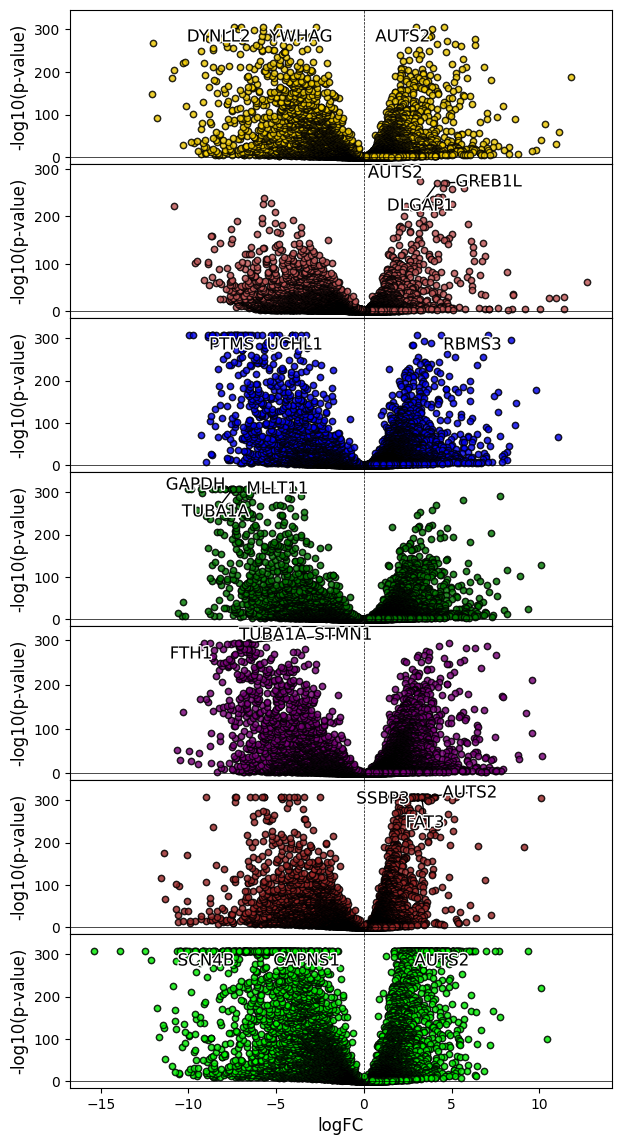

In [32]:
volcanoplot_multi(noradr_de,labels=noradr_names,share_x=True,hspace=0)

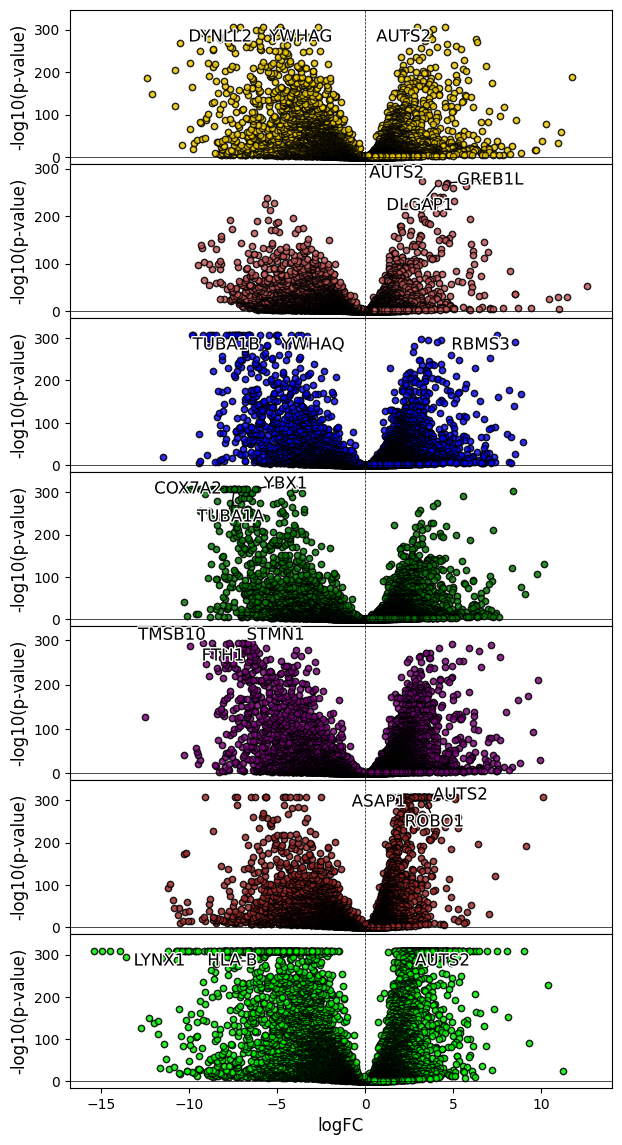

In [277]:
volcanoplot_multi(noradr_de,labels=noradr_names,share_x=True,hspace=0)

/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.

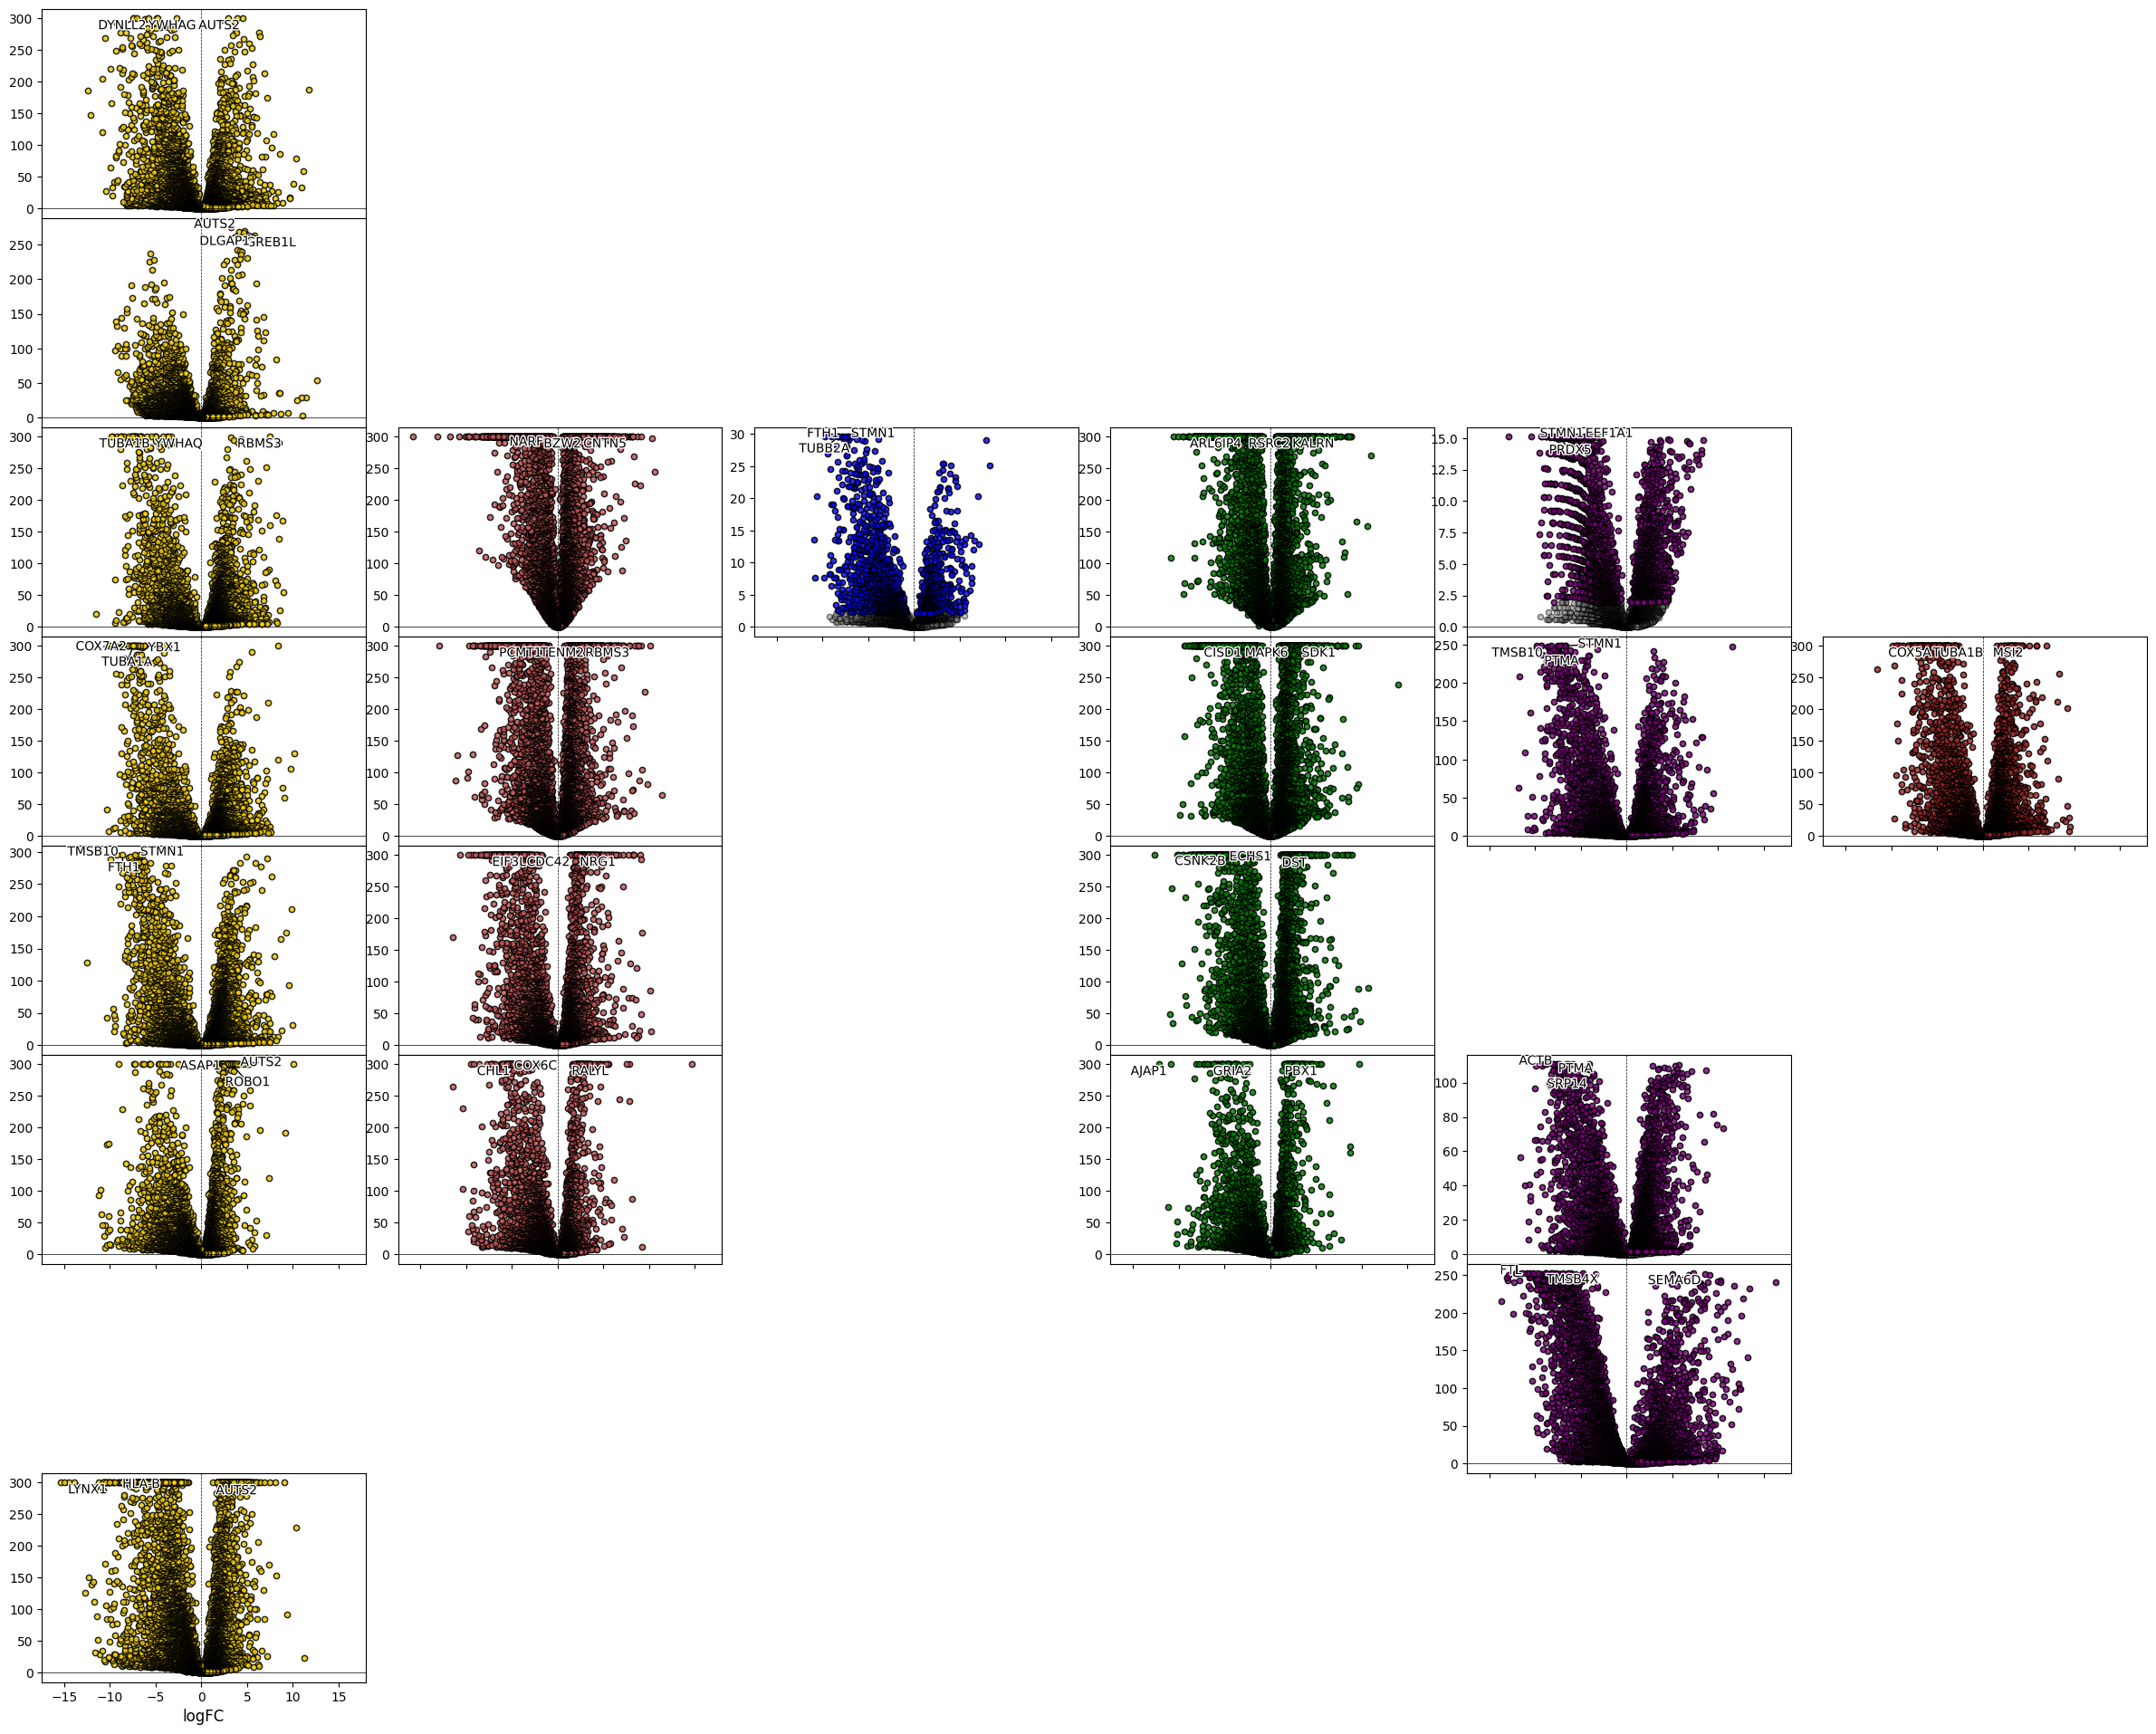

In [301]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths for your data files
files = ['NT_comparison/DRG_cholinergic_species.tsv',
         'NT_comparison/ENS_cholinergic_species.tsv',
         'NT_comparison/Forebrain_GABAergic_species.tsv',
         'NT_comparison/Forebrain_cholinergic_species.tsv',
         'NT_comparison/Forebrain_dopaminergic_species.tsv',
         'NT_comparison/Forebrain_glutamatergic_species.tsv',
         'NT_comparison/Forebrain_noradrenergic_species.tsv',
         'NT_comparison/Hindbrain_GABAergic_species.tsv',
         'NT_comparison/Hindbrain_cholinergic_species.tsv',
         'NT_comparison/Hindbrain_glutamatergic_species.tsv',
         'NT_comparison/Hindbrain_glycinergic_species.tsv',
         'NT_comparison/Hindbrain_noradrenergic_species.tsv',
         'NT_comparison/Midbrain_GABAergic_species.tsv',
         'NT_comparison/Midbrain_cholinergic_species.tsv',
         'NT_comparison/Midbrain_glutamatergic_species.tsv',
         'NT_comparison/SPINAL_CORD_GABAergic_species.tsv',
         'NT_comparison/SPINAL_CORD_cholinergic_species.tsv',
         'NT_comparison/SPINAL_CORD_glutamatergic_species.tsv',
#         'NT_comparison/SPINAL_CORD_noradrenergic_species.tsv',
         'NT_comparison/SYM_noradrenergic_species.tsv',
         'NT_comparison/TG_cholinergic_species.tsv']

# Extract regions and neurotransmitters from file names
def extract_region_and_nt(file):
    file_name = re.sub("NT_comparison/", "", file)
    file_name = re.sub(".tsv", "", file_name)
    file_name = re.sub("SPINAL_CORD", "SPINALCORD", file_name)

    parts = file_name.split('_')
    region = parts[0]
    neurotransmitter = parts[1] if len(parts) > 1 else None
    return region, neurotransmitter

# Preprocess each dataframe
def preprocess_dataframe(file):
    de_df = pd.read_csv(file, sep="\t", index_col=0)
    
    if 'iNeurons' in set(de_df['group']):
        de_df_iNeurons = de_df.loc[de_df['group'] == 'iNeurons'].copy()
        de_df_iNeurons['-log10(p)'] = -np.log10(de_df_iNeurons['pvals'])
        de_df_iNeurons.index = de_df_iNeurons['names']
        de_df_iNeurons['pct_comb'] = de_df_iNeurons['pct_nz_group'] + de_df_iNeurons['pct_nz_reference']
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_comb'] > 0.1]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_group'] != 0]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_reference'] != 0]
        return de_df_iNeurons
    return None

# Organize data into a dictionary {region: {neurotransmitter: dataframe}}
regions_nt_data = {}
for file in files:
    region, neurotransmitter = extract_region_and_nt(file)
    de_df_iNeurons = preprocess_dataframe(file)
    if de_df_iNeurons is not None:
        if region not in regions_nt_data:
            regions_nt_data[region] = {}
        regions_nt_data[region][neurotransmitter] = de_df_iNeurons

# Create a list of neurotransmitters (columns)
neurotransmitters = ['cholinergic', 'GABAergic', 'dopaminergic', 'glutamatergic', 'noradrenergic', 'glycinergic']

# Prepare data for plotting (organized into rows and columns)
regions = sorted(regions_nt_data.keys())

# Function for volcano plot
def volcanoplot_multi(ax, df, color, label, share_x=False, show_annotations=True, show_title=False):
    from adjustText import adjust_text
    from matplotlib.patheffects import withStroke
    bg_color_dots = 'grey'
    markeredge_color = 'k'
    markeredge_width = 0.2

    df = df.dropna()

    # Clip the y-values for better visualization
    df['-log10(p)'] = np.clip(df['-log10(p)'], a_min=None, a_max=300)

    sig_df = df[df['pvals_adj'] < 0.05]

    # Scatter all genes
    ax.scatter(df['logfoldchanges'], df['-log10(p)'], c=bg_color_dots, edgecolor=markeredge_color, s=20, alpha=0.5)
    # Scatter significant genes
    ax.scatter(sig_df['logfoldchanges'], sig_df['-log10(p)'], c=color, edgecolor=markeredge_color, s=20, alpha=0.75)

    # Show title if needed
    if show_title:
        ax.set_title(f"{label} Volcano Plot", fontsize=16)

    if show_annotations:
        topdiff_genes = sig_df.sort_values(by='pvals_adj').head(3).index.tolist()
        texts = []
        outline_effect = withStroke(linewidth=2, foreground='white')
        for gene in topdiff_genes:
            x_pos = df.loc[gene, 'logfoldchanges']
            y_pos = df.loc[gene, '-log10(p)']
            text_label = f"{gene}"
            text = ax.text(x_pos, y_pos, text_label, ha='center', va='center', fontsize=10,
                           color='black', path_effects=[outline_effect], zorder=10)
            texts.append(text)
        adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='k', zorder=1), draw_lines=True)

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=0.5)

# Create the volcano plot for each region and NT
def plot_volcano_grid(regions_nt_data, regions, neurotransmitters):
    fig, axes = plt.subplots(len(regions), len(neurotransmitters), figsize=(5 * len(neurotransmitters), 3 * len(regions)), 
                             sharex=True, sharey=False, gridspec_kw={'hspace': 0, 'wspace': 0.1})
    
    colors = ['gold', 'indianred', 'blue', 'green', 'purple', 'brown', 'lime', 'cyan']  # Colors for different NTs
    
    for i, region in enumerate(regions):
        for j, nt in enumerate(neurotransmitters):
            ax = axes[i][j] if len(regions) > 1 else axes[j]
            if nt in regions_nt_data[region]:
                de_df_iNeurons = regions_nt_data[region][nt]
                color = colors[j % len(colors)]  # Color by NT
                volcanoplot_multi(ax, de_df_iNeurons, color=color, label=f"{region} - {nt}", 
                                  share_x=True if j == len(neurotransmitters) - 1 else False, show_annotations=True, show_title=False)
                ax.set_ylabel('')  # Optionally remove y-axis label for cleaner layout
            else:
                ax.set_visible(False)  # Hide axes with no data
    
    # Set xlabel only for the last row
    for ax in axes[-1]:
        ax.set_xlabel('logFC', fontsize=12)

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_volcano_grid(regions_nt_data, regions, neurotransmitters)


/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.

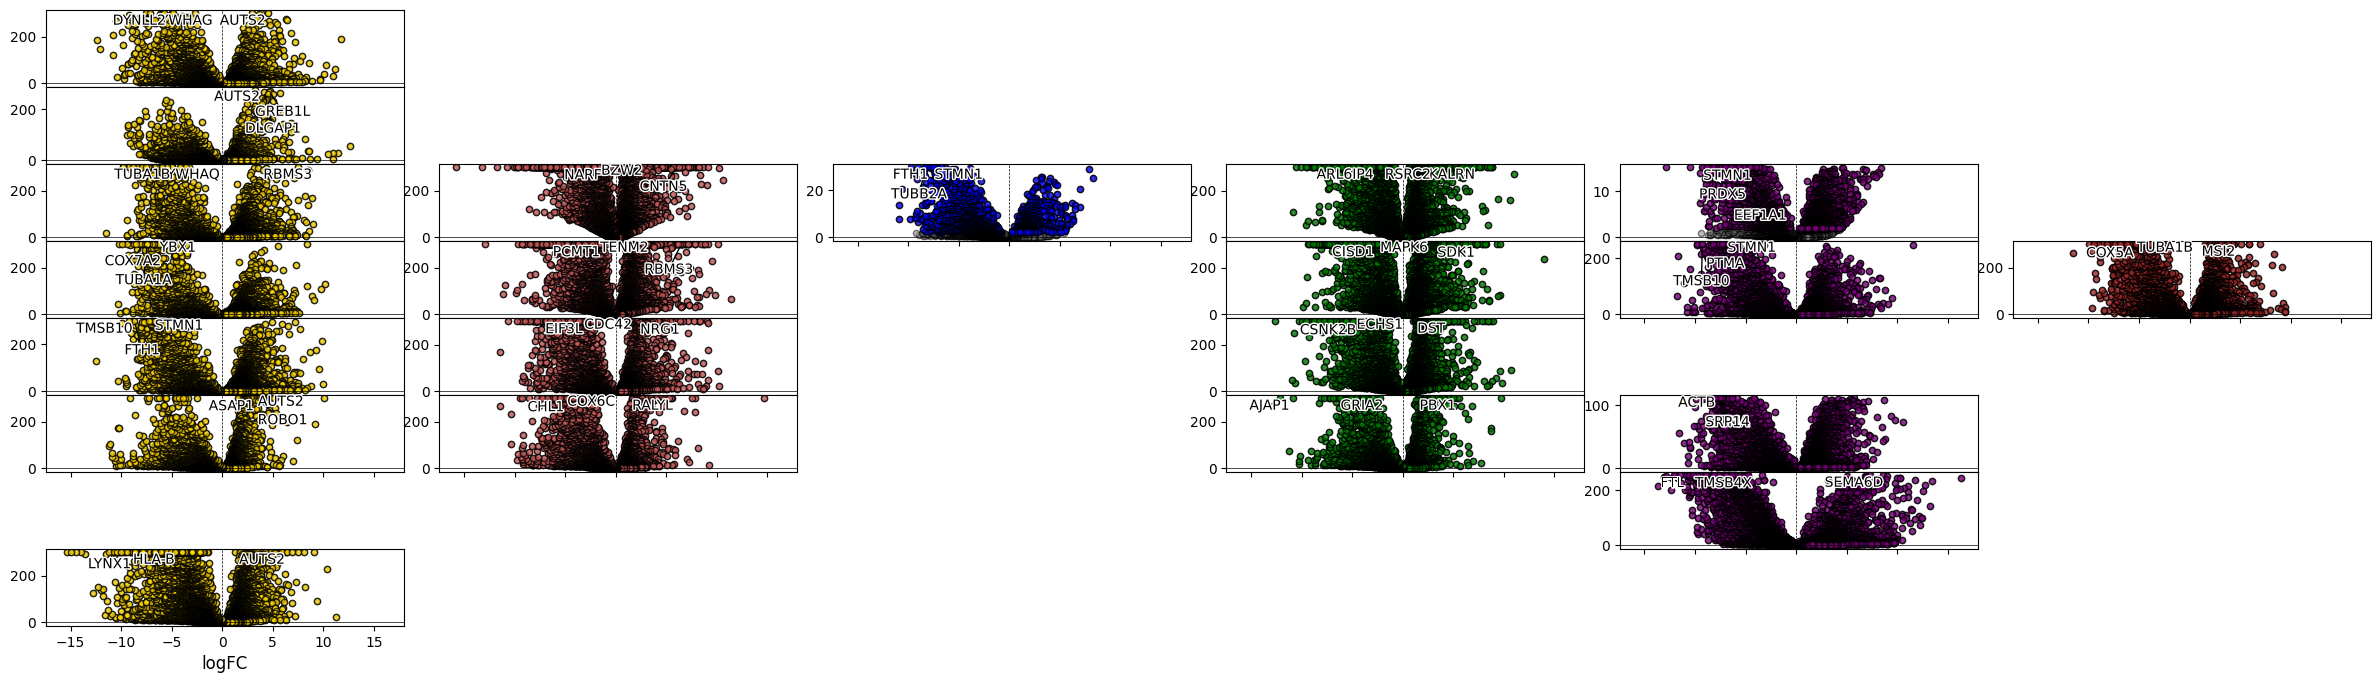

In [305]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths for your data files
files = ['NT_comparison/DRG_cholinergic_species.tsv',
         'NT_comparison/ENS_cholinergic_species.tsv',
         'NT_comparison/Forebrain_GABAergic_species.tsv',
         'NT_comparison/Forebrain_cholinergic_species.tsv',
         'NT_comparison/Forebrain_dopaminergic_species.tsv',
         'NT_comparison/Forebrain_glutamatergic_species.tsv',
         'NT_comparison/Forebrain_noradrenergic_species.tsv',
         'NT_comparison/Hindbrain_GABAergic_species.tsv',
         'NT_comparison/Hindbrain_cholinergic_species.tsv',
         'NT_comparison/Hindbrain_glutamatergic_species.tsv',
         'NT_comparison/Hindbrain_glycinergic_species.tsv',
         'NT_comparison/Hindbrain_noradrenergic_species.tsv',
         'NT_comparison/Midbrain_GABAergic_species.tsv',
         'NT_comparison/Midbrain_cholinergic_species.tsv',
         'NT_comparison/Midbrain_glutamatergic_species.tsv',
         'NT_comparison/SPINAL_CORD_GABAergic_species.tsv',
         'NT_comparison/SPINAL_CORD_cholinergic_species.tsv',
         'NT_comparison/SPINAL_CORD_glutamatergic_species.tsv',
         'NT_comparison/SPINAL_CORD_noradrenergic_species.tsv',
         'NT_comparison/SYM_noradrenergic_species.tsv',
         'NT_comparison/TG_cholinergic_species.tsv']

# Extract regions and neurotransmitters from file names
def extract_region_and_nt(file):
    file_name = re.sub("NT_comparison/", "", file)
    file_name = re.sub(".tsv", "", file_name)
    file_name = re.sub("SPINAL_CORD", "SPINALCORD", file_name)

    parts = file_name.split('_')
    region = parts[0]
    neurotransmitter = parts[1] if len(parts) > 1 else None
    return region, neurotransmitter

# Preprocess each dataframe
def preprocess_dataframe(file):
    de_df = pd.read_csv(file, sep="\t", index_col=0)
    
    if 'iNeurons' in set(de_df['group']):
        de_df_iNeurons = de_df.loc[de_df['group'] == 'iNeurons'].copy()
        de_df_iNeurons['-log10(p)'] = -np.log10(de_df_iNeurons['pvals'])
        de_df_iNeurons.index = de_df_iNeurons['names']
        de_df_iNeurons['pct_comb'] = de_df_iNeurons['pct_nz_group'] + de_df_iNeurons['pct_nz_reference']
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_comb'] > 0.1]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_group'] != 0]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_reference'] != 0]
        return de_df_iNeurons
    return None

# Organize data into a dictionary {region: {neurotransmitter: dataframe}}
regions_nt_data = {}
for file in files:
    region, neurotransmitter = extract_region_and_nt(file)
    de_df_iNeurons = preprocess_dataframe(file)
    if de_df_iNeurons is not None:
        if region not in regions_nt_data:
            regions_nt_data[region] = {}
        regions_nt_data[region][neurotransmitter] = de_df_iNeurons

# Create a list of neurotransmitters (columns)
neurotransmitters = ['cholinergic', 'GABAergic', 'dopaminergic', 'glutamatergic', 'noradrenergic', 'glycinergic']

# Prepare data for plotting (organized into rows and columns)
regions = sorted(regions_nt_data.keys())

# Function for volcano plot
def volcanoplot_multi(ax, df, color, label, share_x=False, show_annotations=True, show_title=False):
    from adjustText import adjust_text
    from matplotlib.patheffects import withStroke
    bg_color_dots = 'grey'
    markeredge_color = 'k'
    markeredge_width = 0.2

    df = df.dropna()

    # Clip the y-values for better visualization
    df['-log10(p)'] = np.clip(df['-log10(p)'], a_min=None, a_max=300)

    sig_df = df[df['pvals_adj'] < 0.05]

    # Scatter all genes
    ax.scatter(df['logfoldchanges'], df['-log10(p)'], c=bg_color_dots, edgecolor=markeredge_color, s=20, alpha=0.5)
    # Scatter significant genes
    ax.scatter(sig_df['logfoldchanges'], sig_df['-log10(p)'], c=color, edgecolor=markeredge_color, s=20, alpha=0.75)

    # Show title if needed
    if show_title:
        ax.set_title(f"{label} Volcano Plot", fontsize=16)

    if show_annotations:
        topdiff_genes = sig_df.sort_values(by='pvals_adj').head(3).index.tolist()
        texts = []
        outline_effect = withStroke(linewidth=2, foreground='white')
        for gene in topdiff_genes:
            x_pos = df.loc[gene, 'logfoldchanges']
            y_pos = df.loc[gene, '-log10(p)']
            text_label = f"{gene}"
            text = ax.text(x_pos, y_pos, text_label, ha='center', va='center', fontsize=10,
                           color='black', path_effects=[outline_effect], zorder=10)
            texts.append(text)
        adjust_text(texts, ax=ax, 
                    arrowprops=dict(arrowstyle='-', color='k', zorder=1), 
                    expand_text=(2,2),  # Control the expansion factor
                    only_move={'points': 'y', 'text': 'y'},  # Only move points and text in the y-direction
                    force_points=0.5,  # Strength of the force on points
                    force_text=0.5)  # Strength of the force on text
        
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=0.5)

# Create the volcano plot for each region and NT
def plot_volcano_grid(regions_nt_data, regions, neurotransmitters):
    fig, axes = plt.subplots(len(regions), len(neurotransmitters), figsize=(5 * len(neurotransmitters), 1 * len(regions)), 
                             sharex=True, sharey=False, gridspec_kw={'hspace': 0, 'wspace': 0.1})
    
    colors = ['gold', 'indianred', 'blue', 'green', 'purple', 'brown', 'lime', 'cyan']  # Colors for different NTs
    
    for i, region in enumerate(regions):
        for j, nt in enumerate(neurotransmitters):
            ax = axes[i][j] if len(regions) > 1 else axes[j]
            if nt in regions_nt_data[region]:
                de_df_iNeurons = regions_nt_data[region][nt]
                color = colors[j % len(colors)]  # Color by NT
                volcanoplot_multi(ax, de_df_iNeurons, color=color, label=f"{region} - {nt}", 
                                  share_x=True if j == len(neurotransmitters) - 1 else False, show_annotations=True, show_title=False)
                ax.set_ylabel('')  # Optionally remove y-axis label for cleaner layout
            else:
                ax.set_visible(False)  # Hide axes with no data
    
    # Set xlabel only for the last row
    for ax in axes[-1]:
        ax.set_xlabel('logFC', fontsize=12)

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_volcano_grid(regions_nt_data, regions, neurotransmitters)


/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.

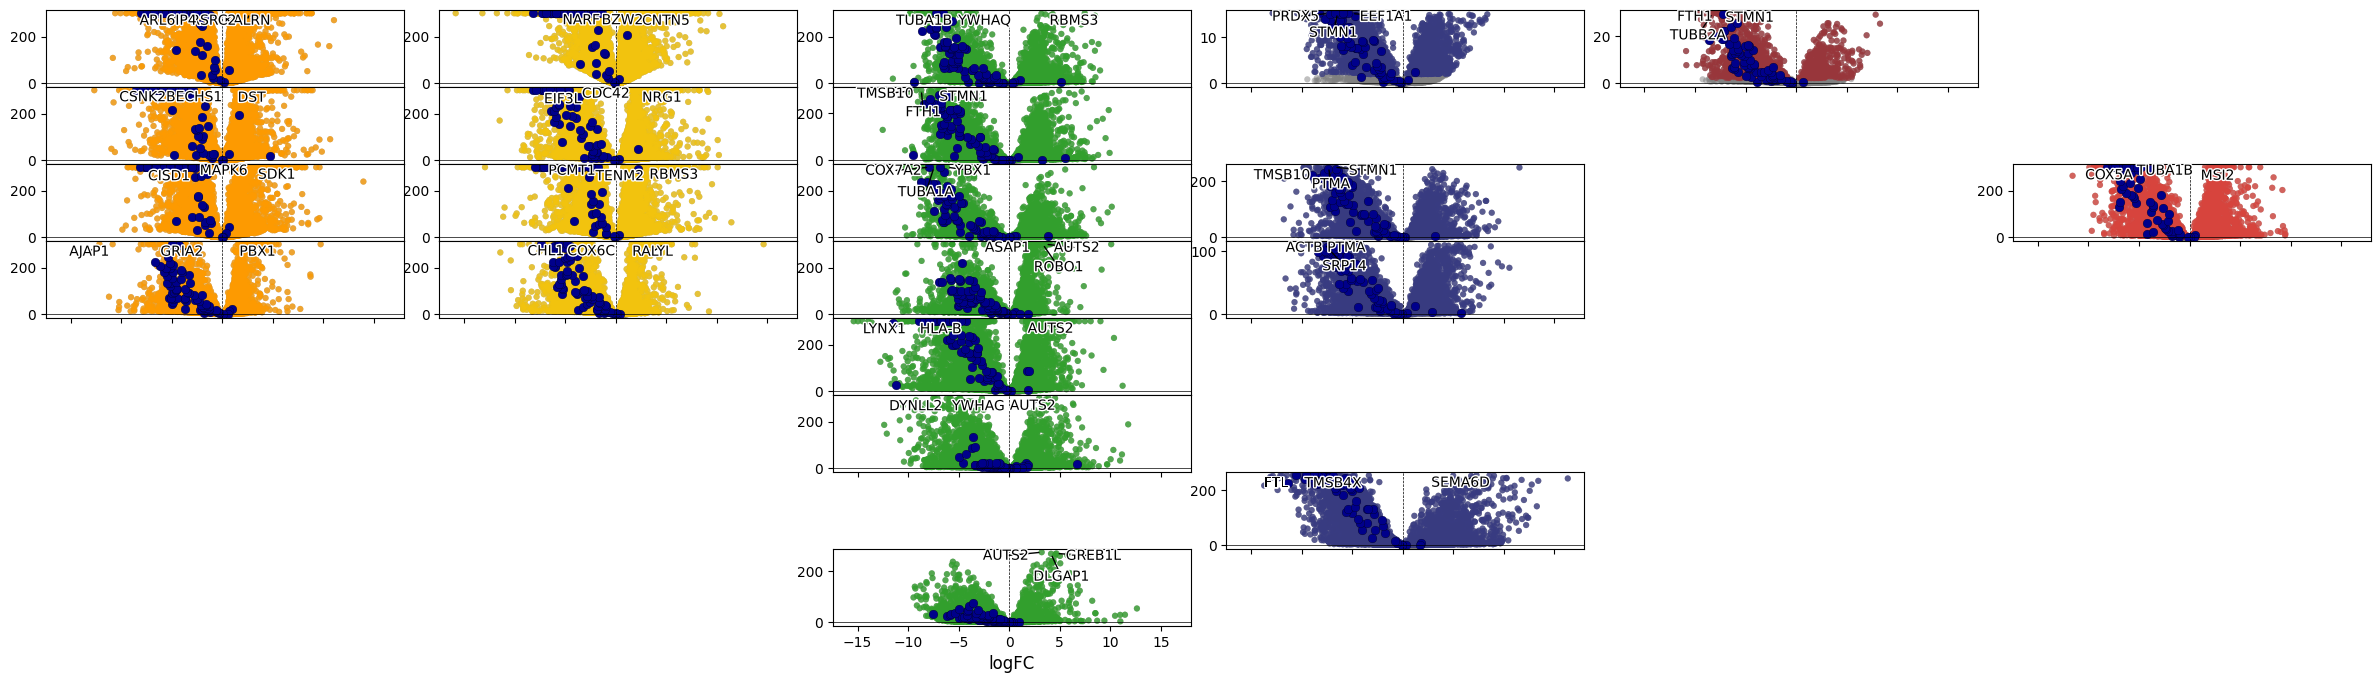

In [329]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths for your data files
files = [
         'NT_comparison/Forebrain_glutamatergic_species.tsv',
         'NT_comparison/Forebrain_GABAergic_species.tsv',
         'NT_comparison/Forebrain_cholinergic_species.tsv',
         'NT_comparison/Forebrain_dopaminergic_species.tsv',
         'NT_comparison/Forebrain_noradrenergic_species.tsv',
    
         'NT_comparison/Midbrain_glutamatergic_species.tsv',
         'NT_comparison/Midbrain_GABAergic_species.tsv',
         'NT_comparison/Midbrain_cholinergic_species.tsv',

         'NT_comparison/Hindbrain_glutamatergic_species.tsv',
         'NT_comparison/Hindbrain_GABAergic_species.tsv',
         'NT_comparison/Hindbrain_cholinergic_species.tsv',
         'NT_comparison/Hindbrain_noradrenergic_species.tsv',
         'NT_comparison/Hindbrain_glycinergic_species.tsv',

         'NT_comparison/SPINAL_CORD_glutamatergic_species.tsv',
         'NT_comparison/SPINAL_CORD_GABAergic_species.tsv',
         'NT_comparison/SPINAL_CORD_cholinergic_species.tsv',
         'NT_comparison/SPINAL_CORD_noradrenergic_species.tsv',
    
        'NT_comparison/DRG_cholinergic_species.tsv',
         'NT_comparison/TG_cholinergic_species.tsv',
         'NT_comparison/SYM_noradrenergic_species.tsv',
        'NT_comparison/ENS_cholinergic_species.tsv',

]

NT_translate_dictionary = {}
NT_translate_dictionary['glutamatergic'] = 'GLUT'
NT_translate_dictionary['GABAergic'] = 'GABA'
NT_translate_dictionary['cholinergic'] = 'CHO'
NT_translate_dictionary['glycinergic'] = 'GLY'
NT_translate_dictionary['noradrenergic'] = 'NOR'
NT_translate_dictionary['dopaminergic'] = 'DOPA'

color_dict_annots = {}
color_dict_annots['GLUT'] = '#FE9B01'
color_dict_annots['GABA'] = '#F3C40E'
color_dict_annots['CHO'] = '#32A02D'
color_dict_annots['GLY'] = '#D8443D'
color_dict_annots['NOR'] = '#383B81'
color_dict_annots['DOPA'] = '#99363B'


# Extract regions and neurotransmitters from file names
def extract_region_and_nt(file):
    file_name = re.sub("NT_comparison/", "", file)
    file_name = re.sub(".tsv", "", file_name)
    file_name = re.sub("SPINAL_CORD", "SPINALCORD", file_name)

    parts = file_name.split('_')
    region = parts[0]
    neurotransmitter = parts[1] if len(parts) > 1 else None
    return region, neurotransmitter

# Preprocess each dataframe
def preprocess_dataframe(file):
    de_df = pd.read_csv(file, sep="\t", index_col=0)
    
    if 'iNeurons' in set(de_df['group']):
        de_df_iNeurons = de_df.loc[de_df['group'] == 'iNeurons'].copy()
        de_df_iNeurons['-log10(p)'] = -np.log10(de_df_iNeurons['pvals'])
        de_df_iNeurons.index = de_df_iNeurons['names']
        de_df_iNeurons['pct_comb'] = de_df_iNeurons['pct_nz_group'] + de_df_iNeurons['pct_nz_reference']
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_comb'] > 0.1]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_group'] != 0]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_reference'] != 0]
        return de_df_iNeurons
    return None

# Organize data into a dictionary {region: {neurotransmitter: dataframe}}
regions_nt_data = {}
for file in files:
    region, neurotransmitter = extract_region_and_nt(file)
    de_df_iNeurons = preprocess_dataframe(file)
    if de_df_iNeurons is not None:
        if region not in regions_nt_data:
            regions_nt_data[region] = {}
        regions_nt_data[region][neurotransmitter] = de_df_iNeurons

# Create a list of neurotransmitters (columns)
neurotransmitters = ['cholinergic', 'GABAergic', 'dopaminergic', 'glutamatergic', 'noradrenergic', 'glycinergic']


# Function for volcano plot
def volcanoplot_multi(ax, df, color, label, x='logfoldchanges', y='-log10(p)',pval_adj='pvals_adj', share_x=False, show_annotations=True, show_title=False, 
                     outline=True, selected_genes=None, selected_color='orange', selected_outline=True, bg_color_dots = 'grey',
                      max_y_value=300):
    from adjustText import adjust_text
    from matplotlib.patheffects import withStroke
    markeredge_color = 'k' if outline else 'none'
    markeredge_width = 0.2 if outline else 0

    df = df.dropna()

    # Clip the y-values for better visualization
    df[y] = np.clip(df[y], a_min=None, a_max=max_y_value)

    sig_df = df[df[pval_adj] < 0.05]

    # Scatter all genes
    ax.scatter(df[x], df[y], c=bg_color_dots, edgecolor=markeredge_color, linewidth=markeredge_width, s=20, alpha=0.5)
    # Scatter significant genes
    ax.scatter(sig_df[x], sig_df[y], c=color, edgecolor=markeredge_color, linewidth=markeredge_width,  s=20, alpha=0.75)

    # Highlight selected genes
    if selected_genes is not None:
        markeredge_color = 'k' if selected_outline else 'none'
        markeredge_width = 0.2 if selected_outline else 0

        selected_df = df.loc[df.index.isin(selected_genes)]
        ax.scatter(selected_df['logfoldchanges'], selected_df['-log10(p)'], c=selected_color, edgecolor=markeredge_color, linewidth=markeredge_width, s=40, alpha=1)

    # Show title if needed
    if show_title:
        ax.set_title(f"{label} Volcano Plot", fontsize=16)

    if show_annotations:
        topdiff_genes = sig_df.sort_values(by=pval_adj).head(3).index.tolist()
        texts = []
        outline_effect = withStroke(linewidth=2, foreground='white')
        for gene in topdiff_genes:
            x_pos = df.loc[gene, x]
            y_pos = df.loc[gene, y]
            text_label = f"{gene}"
            text = ax.text(x_pos, y_pos, text_label, ha='center', va='center', fontsize=10,
                           color='black', path_effects=[outline_effect], zorder=10)
            texts.append(text)
            
        adjust_text(texts, ax=ax, 
                    arrowprops=dict(arrowstyle='-', color='k', zorder=1), 
                    expand_text=(2,2),  
                    only_move={'points': 'xy', 'text': 'xy'},  
                    force_points=0.5,  
                    force_text=(0.1,0.2)*2)  
        
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=0.5)

# Create the volcano plot for each region and NT
def plot_volcano_grid(regions_nt_data, regions, neurotransmitters, selected_genes=None, selected_color='orange', outline=True):
    fig, axes = plt.subplots(len(regions), len(neurotransmitters), figsize=(5 * len(neurotransmitters), 1 * len(regions)), 
                             sharex=True, sharey=False, gridspec_kw={'hspace': 0, 'wspace': 0.1})
    
    colors = ['gold', 'indianred', 'blue', 'green', 'purple', 'brown', 'lime', 'cyan']  # Colors for different NTs
    
    for i, region in enumerate(regions):
        for j, nt in enumerate(neurotransmitters):
            ax = axes[i][j] if len(regions) > 1 else axes[j]
            if nt in regions_nt_data[region]:
                de_df_iNeurons = regions_nt_data[region][nt]
                color = colors[j % len(colors)]  # Color by NT
                nt_abbr = NT_translate_dictionary[nt]
                nt_color = color_dict_annots[nt_abbr]
                volcanoplot_multi(ax, de_df_iNeurons, color=nt_color, label=f"{region} - {nt}", 
                                  share_x=True if j == len(neurotransmitters) - 1 else False, 
                                  show_annotations=True, show_title=False, outline=outline, 
                                  selected_genes=selected_genes, selected_color=selected_color)
                ax.set_ylabel('')  # Optionally remove y-axis label for cleaner layout
            else:
                ax.set_visible(False)  # Hide axes with no data
    
    # Set xlabel only for the last row
    for ax in axes[-1]:
        ax.set_xlabel('logFC', fontsize=12)

    plt.tight_layout()
    plt.show()

# Example of how to call the plotting function
oxphos_genes = pd.read_csv("/cluster/home/jjanssens/jjans/resources/geneLists/GO/oxphos.txt",sep="\t",index_col=0,header=None)
oxphos_genes = list(set(oxphos_genes[2]))

region_order = ['Forebrain','Midbrain','Hindbrain','SPINALCORD','TG','DRG','SYM','ENS']
nt_order = ['glutamatergic','GABAergic','cholinergic','noradrenergic','dopaminergic','glycinergic']

plot_volcano_grid(regions_nt_data, region_order, nt_order, selected_genes=oxphos_genes, selected_color='darkblue', outline=False)


/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.

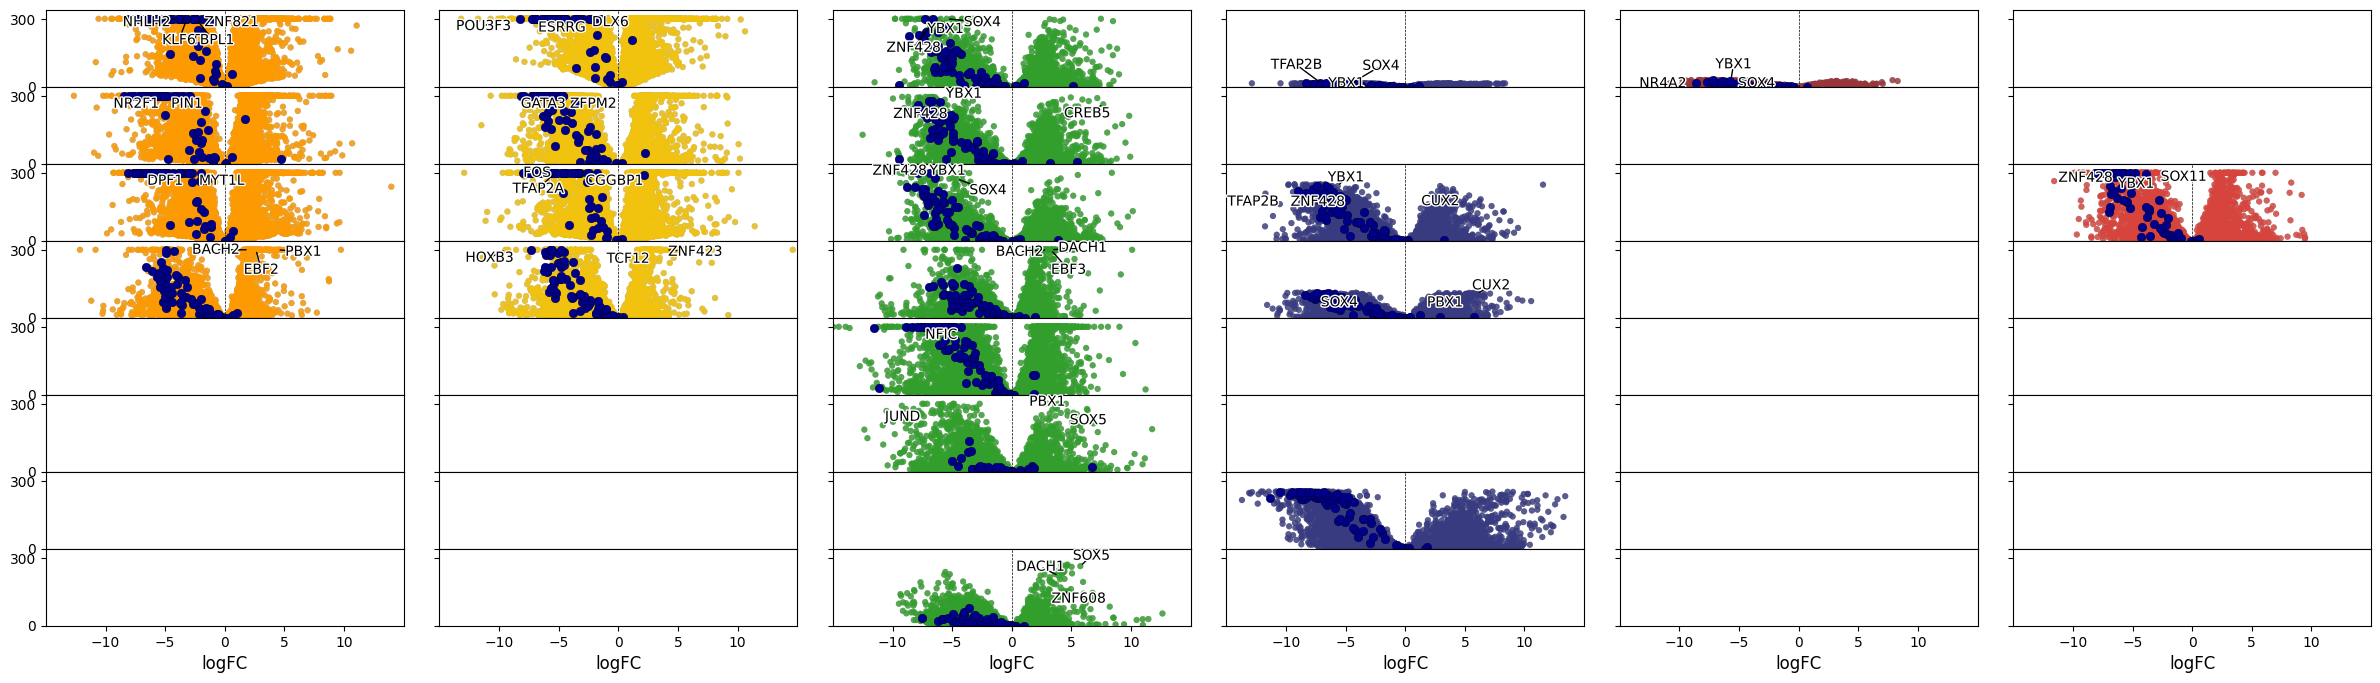

In [343]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths for your data files
files = [
         'NT_comparison/Forebrain_glutamatergic_species.tsv',
         'NT_comparison/Forebrain_GABAergic_species.tsv',
         'NT_comparison/Forebrain_cholinergic_species.tsv',
         'NT_comparison/Forebrain_dopaminergic_species.tsv',
         'NT_comparison/Forebrain_noradrenergic_species.tsv',
    
         'NT_comparison/Midbrain_glutamatergic_species.tsv',
         'NT_comparison/Midbrain_GABAergic_species.tsv',
         'NT_comparison/Midbrain_cholinergic_species.tsv',

         'NT_comparison/Hindbrain_glutamatergic_species.tsv',
         'NT_comparison/Hindbrain_GABAergic_species.tsv',
         'NT_comparison/Hindbrain_cholinergic_species.tsv',
         'NT_comparison/Hindbrain_noradrenergic_species.tsv',
         'NT_comparison/Hindbrain_glycinergic_species.tsv',

         'NT_comparison/SPINAL_CORD_glutamatergic_species.tsv',
         'NT_comparison/SPINAL_CORD_GABAergic_species.tsv',
         'NT_comparison/SPINAL_CORD_cholinergic_species.tsv',
         'NT_comparison/SPINAL_CORD_noradrenergic_species.tsv',
    
        'NT_comparison/DRG_cholinergic_species.tsv',
         'NT_comparison/TG_cholinergic_species.tsv',
         'NT_comparison/SYM_noradrenergic_species.tsv',
        'NT_comparison/ENS_cholinergic_species.tsv',

]

NT_translate_dictionary = {}
NT_translate_dictionary['glutamatergic'] = 'GLUT'
NT_translate_dictionary['GABAergic'] = 'GABA'
NT_translate_dictionary['cholinergic'] = 'CHO'
NT_translate_dictionary['glycinergic'] = 'GLY'
NT_translate_dictionary['noradrenergic'] = 'NOR'
NT_translate_dictionary['dopaminergic'] = 'DOPA'

color_dict_annots = {}
color_dict_annots['GLUT'] = '#FE9B01'
color_dict_annots['GABA'] = '#F3C40E'
color_dict_annots['CHO'] = '#32A02D'
color_dict_annots['GLY'] = '#D8443D'
color_dict_annots['NOR'] = '#383B81'
color_dict_annots['DOPA'] = '#99363B'


# Extract regions and neurotransmitters from file names
def extract_region_and_nt(file):
    file_name = re.sub("NT_comparison/", "", file)
    file_name = re.sub(".tsv", "", file_name)
    file_name = re.sub("SPINAL_CORD", "SPINALCORD", file_name)

    parts = file_name.split('_')
    region = parts[0]
    neurotransmitter = parts[1] if len(parts) > 1 else None
    return region, neurotransmitter

# Preprocess each dataframe
def preprocess_dataframe(file):
    de_df = pd.read_csv(file, sep="\t", index_col=0)
    
    if 'iNeurons' in set(de_df['group']):
        de_df_iNeurons = de_df.loc[de_df['group'] == 'iNeurons'].copy()
        de_df_iNeurons['-log10(p)'] = -np.log10(de_df_iNeurons['pvals'])
        de_df_iNeurons.index = de_df_iNeurons['names']
        de_df_iNeurons['pct_comb'] = de_df_iNeurons['pct_nz_group'] + de_df_iNeurons['pct_nz_reference']
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_comb'] > 0.1]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_group'] != 0]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_reference'] != 0]
        return de_df_iNeurons
    return None

# Organize data into a dictionary {region: {neurotransmitter: dataframe}}
regions_nt_data = {}
for file in files:
    region, neurotransmitter = extract_region_and_nt(file)
    de_df_iNeurons = preprocess_dataframe(file)
    if de_df_iNeurons is not None:
        if region not in regions_nt_data:
            regions_nt_data[region] = {}
        regions_nt_data[region][neurotransmitter] = de_df_iNeurons

# Create a list of neurotransmitters (columns)
neurotransmitters = ['cholinergic', 'GABAergic', 'dopaminergic', 'glutamatergic', 'noradrenergic', 'glycinergic']


# Function for volcano plot
def volcanoplot_multi(ax, df, color, label, x='logfoldchanges', y='-log10(p)',pval_adj='pvals_adj', share_x=False, show_annotations=True, show_annotations_family=None, show_title=False, 
                     outline=True, selected_genes=None, selected_color='orange', selected_outline=True, bg_color_dots = 'grey',
                      max_y_value=300):
    from adjustText import adjust_text
    from matplotlib.patheffects import withStroke
    markeredge_color = 'k' if outline else 'none'
    markeredge_width = 0.2 if outline else 0

    df = df.dropna()

    # Clip the y-values for better visualization
    df[y] = np.clip(df[y], a_min=None, a_max=max_y_value)

    sig_df = df[df[pval_adj] < 0.05]

    # Scatter all genes
    ax.scatter(df[x], df[y], c=bg_color_dots, edgecolor=markeredge_color, linewidth=markeredge_width, s=20, alpha=0.5)
    # Scatter significant genes
    ax.scatter(sig_df[x], sig_df[y], c=color, edgecolor=markeredge_color, linewidth=markeredge_width,  s=20, alpha=0.75)

    # Highlight selected genes
    if selected_genes is not None:
        markeredge_color = 'k' if selected_outline else 'none'
        markeredge_width = 0.2 if selected_outline else 0

        selected_df = df.loc[df.index.isin(selected_genes)]
        ax.scatter(selected_df['logfoldchanges'], selected_df['-log10(p)'], c=selected_color, edgecolor=markeredge_color, linewidth=markeredge_width, s=40, alpha=1)

    # Show title if needed
    if show_title:
        ax.set_title(f"{label} Volcano Plot", fontsize=16)

    if show_annotations:
        topdiff_genes = sig_df.sort_values(by=pval_adj).head(100).index.tolist()
        texts = []
        outline_effect = withStroke(linewidth=2, foreground='white')
        if show_annotations_family:
            topdiff_genes = [x for x in topdiff_genes if x in show_annotations_family]
            if len(topdiff_genes)>4:
                topdiff_genes = topdiff_genes[0:3]
        else:
            topdiff_genes = topdiff_genes[0:3]

        for gene in topdiff_genes:
            x_pos = df.loc[gene, x]
            y_pos = df.loc[gene, y]
            text_label = f"{gene}"
            text = ax.text(x_pos, y_pos, text_label, ha='center', va='center', fontsize=10,
                           color='black', path_effects=[outline_effect], zorder=10)
            texts.append(text)
            
        adjust_text(texts, ax=ax, 
                    arrowprops=dict(arrowstyle='-', color='k', zorder=1), 
                    expand_text=(2,2),  
                    only_move={'points': 'xy', 'text': 'xy'},  
                    force_points=0.5,  
                    force_text=(0.1,0.2)*2)  
        
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=0.5)

# Create the volcano plot for each region and NT
# Create the volcano plot for each region and NT
def plot_volcano_grid(regions_nt_data, regions, neurotransmitters, selected_genes=None, show_annotations_family=None, selected_color='orange', outline=True,save_path=None):
    fig, axes = plt.subplots(len(regions), len(neurotransmitters), figsize=(5 * len(neurotransmitters), 1 * len(regions)), 
                             sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0.1})
    
    colors = ['gold', 'indianred', 'blue', 'green', 'purple', 'brown', 'lime', 'cyan']  # Colors for different NTs
    
    for i, region in enumerate(regions):
        for j, nt in enumerate(neurotransmitters):
            ax = axes[i][j] if len(regions) > 1 else axes[j]
            if nt in regions_nt_data[region]:
                de_df_iNeurons = regions_nt_data[region][nt]
                color = colors[j % len(colors)]  # Color by NT
                nt_abbr = NT_translate_dictionary[nt]
                nt_color = color_dict_annots[nt_abbr]
                volcanoplot_multi(ax, de_df_iNeurons, color=nt_color, label=f"{region} - {nt}", 
                                  share_x=True if j == len(neurotransmitters) - 1 else False, 
                                  show_annotations=True, show_title=False, outline=outline, 
                                  selected_genes=selected_genes, selected_color=selected_color,show_annotations_family=show_annotations_family)
                ax.set_ylabel('')  # Optionally remove y-axis label for cleaner layout
            else:
                ax.set_visible(True)  # Keep the axes visible even if no data
                ax.set_xlim(-15, 15)  # Set limits to ensure ticks show up
                ax.set_ylim(0, 340)  # Adjust according to your max_y_value
                
                # Set x-ticks and y-ticks manually for empty plots
                ax.set_xticks(np.arange(-10, 15, 5))  # Adjust x-ticks range as necessary
                ax.set_yticks(np.arange(0, 301, 300))  # Adjust y-ticks range as necessary

    # Set xlabel only for the last row
    for ax in axes[-1]:
        ax.set_xlabel('logFC', fontsize=12)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path,dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()

# Example of how to call the plotting function
oxphos_genes = pd.read_csv("/cluster/home/jjanssens/jjans/resources/geneLists/GO/oxphos.txt",sep="\t",index_col=0,header=None)
oxphos_genes = list(set(oxphos_genes[2]))

TF_genes = pd.read_csv('/cluster/home/jjanssens/jjans/resources/geneLists/human_TFs/utoronto_human_tfs_v_1.01.txt',sep='\t',header=None)
TF_genes = list(set(TF_genes[0]))

region_order = ['Forebrain','Midbrain','Hindbrain','SPINALCORD','TG','DRG','SYM','ENS']
nt_order = ['glutamatergic','GABAergic','cholinergic','noradrenergic','dopaminergic','glycinergic']


plot_volcano_grid(regions_nt_data, region_order, nt_order, 
                  selected_genes=oxphos_genes, 
                  show_annotations_family = TF_genes,
                  selected_color='darkblue', outline=False,save_path='NT_comparison_DE_arranged.png')


In [338]:
TF_genes

['TBP',
 'ZNF493',
 'ZBED5',
 'ZSCAN26',
 'ZNF556',
 'PHF20',
 'DOT1L',
 'ZNF737',
 'TWIST2',
 'CENPBD1',
 'KLF14',
 'RARA',
 'ZNF671',
 'DR1',
 'ZNF226',
 'BACH2',
 'ZNF623',
 'ZNF286A',
 'NR3C1',
 'EN1',
 'BRF2',
 'TSC22D1',
 'MYNN',
 'PURG',
 'ZNF879',
 'ZNF189',
 'BSX',
 'ZNF573',
 'CHCHD3',
 'DNTTIP1',
 'ZNF418',
 'ZNF544',
 'ZNF404',
 'ZNF627',
 'FOSL1',
 'KLF7',
 'THAP10',
 'ZNF678',
 'ZNF524',
 'SIX3',
 'ZNF516',
 'EBF1',
 'RXRG',
 'GATAD2B',
 'ZNF775',
 'IRX2',
 'ZNF699',
 'ZNF765',
 'PA2G4',
 'DRAP1',
 'ZNF417',
 'FEZF1',
 'AEBP1',
 'TBX18',
 'ZNF114',
 'NPAS1',
 'TIGD2',
 'SP9',
 'ZNF655',
 'ZNF250',
 'ZIC1',
 'MBD6',
 'ZNF629',
 'HKR1',
 'NFATC2',
 'T',
 'ZNF624',
 'IRF8',
 'PRDM12',
 'ZNF788',
 'ZNF394',
 'RBPJL',
 'ZNF791',
 'ZNF672',
 'FOXA3',
 'JRKL',
 'ZNF625',
 'HMBOX1',
 'ZNF236',
 'ZNF17',
 'ZNF682',
 'DLX2',
 'ZBTB18',
 'ZNF74',
 'ZNF565',
 'SHOX',
 'NFIB',
 'ZNF286B',
 'NR5A2',
 'YBX2',
 'ARX',
 'ZNF414',
 'ZHX3',
 'TGIF1',
 'TIGD5',
 'ZSCAN10',
 'PURB',
 'ZNF445'

In [326]:
regions

['DRG', 'ENS', 'Forebrain', 'Hindbrain', 'Midbrain', 'SPINALCORD', 'SYM', 'TG']

In [327]:
region_order

['Forebrain', 'Midbrain', 'SPINALCORD', 'TG', 'DRG', 'SYM', 'ENS']

In [324]:
neurotransmitters

['cholinergic',
 'GABAergic',
 'dopaminergic',
 'glutamatergic',
 'noradrenergic',
 'glycinergic']

In [292]:
regions

['DRG', 'ENS', 'Forebrain', 'Hindbrain', 'Midbrain', 'SPINAL', 'SYM', 'TG']

In [5]:
import pandas as pd
import numpy as np

In [9]:
de_NT_files = !ls NT_comparison/*gic_species.tsv
file_counter = 0

import re
file_names = []
for file in de_NT_files:
    file_name = re.sub("NT_comparison/","",file)
    file_name = re.sub(".tsv","",file_name)
    file_names.append(file_name)


import re
for file in de_NT_files:
    file_name = re.sub("NT_comparison/","",file)
    file_name = re.sub(".tsv","",file_name)

    de_df = pd.read_csv(file,sep="\t",index_col=0)

    if 'iNeurons' in list(set(de_df['group'])):
        de_df_iNeurons = de_df.loc[de_df['group']=='iNeurons'].copy()
        de_df_iNeurons['-log10(p)'] = -np.log10(de_df_iNeurons['pvals'])
    
        y = '-log10(p)'
        max_y_value = max(sorted(list(set(de_df_iNeurons[y])),reverse=True)[1], 300)
        de_df_iNeurons[y] = de_df_iNeurons[y].replace([np.inf], max_y_value)
        de_df_iNeurons[y] = np.clip(de_df_iNeurons[y], a_min=None, a_max=max_y_value)
    
        de_df_iNeurons['signed_pval'] = de_df_iNeurons[y]*de_df_iNeurons['logfoldchanges']
        de_df_iNeurons['pct_comb'] = de_df_iNeurons['pct_nz_group'] + de_df_iNeurons['pct_nz_reference']
        de_df_iNeurons.index = de_df_iNeurons['names']
        
        if file_counter == 0:
            all_genes = list(set(de_df_iNeurons['names']))
            de_df_summary = pd.DataFrame(index=all_genes,columns=file_names)
            file_counter+=1

        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_comb'] > 0.1]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_group'] != 0]
        de_df_iNeurons = de_df_iNeurons.loc[de_df_iNeurons['pct_nz_reference'] != 0]

    
        de_df_summary.loc[de_df_iNeurons.index,file_name] = np.array(de_df_iNeurons['signed_pval'])

/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.

In [10]:
de_df_summary = de_df_summary.fillna(0)

/scratch/tmp.10035002.jjanssens/ipykernel_3367288/1313623281.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  de_df_summary = de_df_summary.fillna(0)


In [11]:
neg_genes = list(set(de_df_summary.T.sum().sort_values().head(n=250).index))
pos_genes = list(set(de_df_summary.T.sum().sort_values(ascending=False).head(n=250).index))
reg_genes = neg_genes + pos_genes

In [12]:
de_df_summary = de_df_summary.astype('float')

In [13]:
region_order = ['Forebrain','Midbrain','Hindbrain','SPINAL_CORD','TG','DRG','SYM','ENS']
nt_order = ['glutamatergic','GABAergic','cholinergic','noradrenergic','dopaminergic','glycinergic']
region_NT_labels = []
for region in region_order:
    for NT in nt_order:
        region_NT_labels.append(region+"_"+NT+"_species")
region_NT_labels = [x for x in region_NT_labels if x in de_df_summary.columns]

In [14]:
de_df_summary_plot = de_df_summary.loc[reg_genes,region_NT_labels].copy()
de_df_summary_plot.columns = [re.sub("_species","",x) for x in de_df_summary_plot.columns]

In [16]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

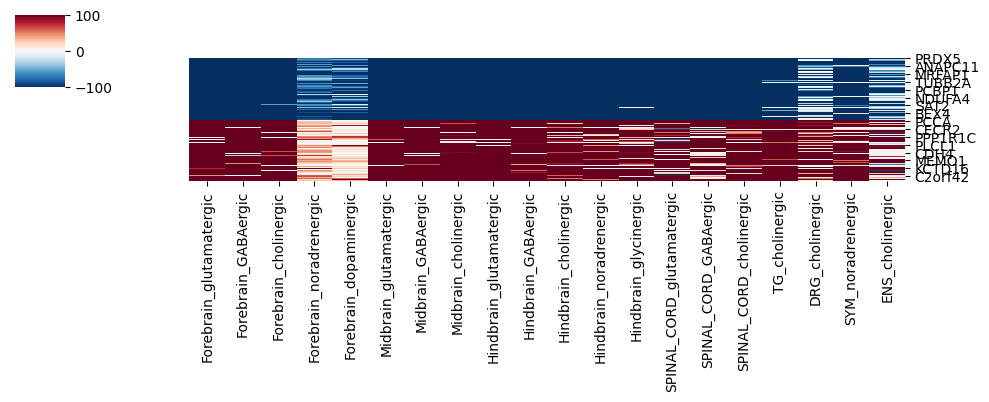

In [17]:
sns.clustermap(de_df_summary_plot,vmin=-100,vmax=100,cmap='RdBu_r',col_cluster=False,row_cluster=False,figsize=(10,4))
#plt.savefig("NT_comparison_top_250_up_down_prim_iNeurons.png",dpi=350,bbox_inches='tight',pad_inches=0)
#plt.savefig("NT_comparison_top_250_up_down_prim_iNeurons.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [33]:
de_NT_files = !ls NT_comparison/*gic_species.tsv
file_counter = 0

import re
file_names = []
for file in de_NT_files:
    file_name = re.sub("NT_comparison/","",file)
    file_name = re.sub(".tsv","",file_name)
    file_names.append(file_name)


import re
for file in de_NT_files:
    file_name = re.sub("NT_comparison/","",file)
    file_name = re.sub(".tsv","",file_name)

    de_df = pd.read_csv(file,sep="\t",index_col=0)

    if 'iNeurons' in list(set(de_df['group'])):
        de_df_iNeurons = de_df.loc[de_df['group']=='iNeurons'].copy()
        de_df_iNeurons['-log10(p)'] = -np.log10(de_df_iNeurons['pvals'])
    
        y = '-log10(p)'
        max_y_value = max(sorted(list(set(de_df_iNeurons[y])),reverse=True)[1], 300)
        de_df_iNeurons[y] = de_df_iNeurons[y].replace([np.inf], max_y_value)
        de_df_iNeurons[y] = np.clip(de_df_iNeurons[y], a_min=None, a_max=max_y_value)
    
        de_df_iNeurons['signed_pval'] = de_df_iNeurons[y]*de_df_iNeurons['logfoldchanges']
        de_df_iNeurons.index = de_df_iNeurons['names']
        
        if file_counter == 0:
            all_genes = list(set(de_df_iNeurons['names']))
            de_df_summary = pd.DataFrame(index=all_genes,columns=file_names)
            file_counter+=1
    
        de_df_summary.loc[de_df_iNeurons.index,file_name] = np.array(de_df_iNeurons['signed_pval'])

/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cluster/home/jjanssens/.

In [34]:
de_df_summary = de_df_summary.dropna(axis=1)

In [35]:
neg_genes = list(set(de_df_summary.T.sum().sort_values().head(n=250).index))
pos_genes = list(set(de_df_summary.T.sum().sort_values(ascending=False).head(n=250).index))
reg_genes = neg_genes + pos_genes

In [36]:
de_df_summary = de_df_summary.astype('float')

In [37]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [38]:
region_order = ['Forebrain','Midbrain','Hindbrain','SPINAL_CORD','TG','DRG','SYM','ENS']
nt_order = ['glutamatergic','GABAergic','cholinergic','noradrenergic','dopaminergic','glycinergic']


In [39]:
region_NT_labels = []
for region in region_order:
    for NT in nt_order:
        region_NT_labels.append(region+"_"+NT+"_species")
region_NT_labels = [x for x in region_NT_labels if x in de_df_summary.columns]

In [40]:
de_df_summary_plot = de_df_summary.loc[reg_genes,region_NT_labels].copy()
de_df_summary_plot.columns = [re.sub("_species","",x) for x in de_df_summary_plot.columns]

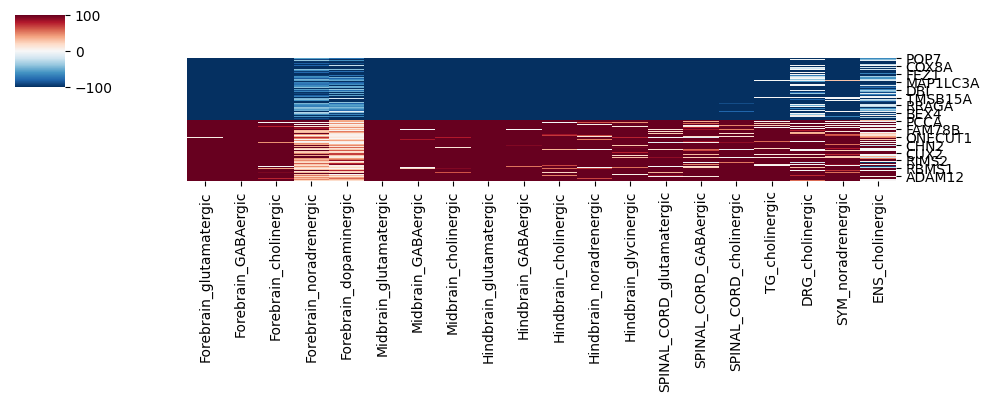

In [41]:
sns.clustermap(de_df_summary_plot,vmin=-100,vmax=100,cmap='RdBu_r',col_cluster=False,row_cluster=False,figsize=(10,4))
plt.savefig("NT_comparison_top_250_up_down_prim_iNeurons.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.savefig("NT_comparison_top_250_up_down_prim_iNeurons.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

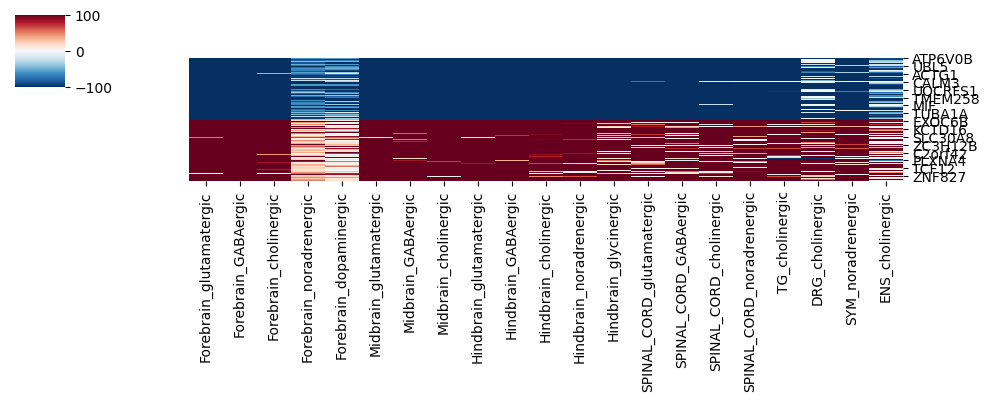

In [29]:
sns.clustermap(de_df_summary_plot,vmin=-100,vmax=100,cmap='RdBu_r',col_cluster=False,row_cluster=False,figsize=(10,4))
plt.savefig("NT_comparison_top_250_up_down_prim_iNeurons.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.savefig("NT_comparison_top_250_up_down_prim_iNeurons.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

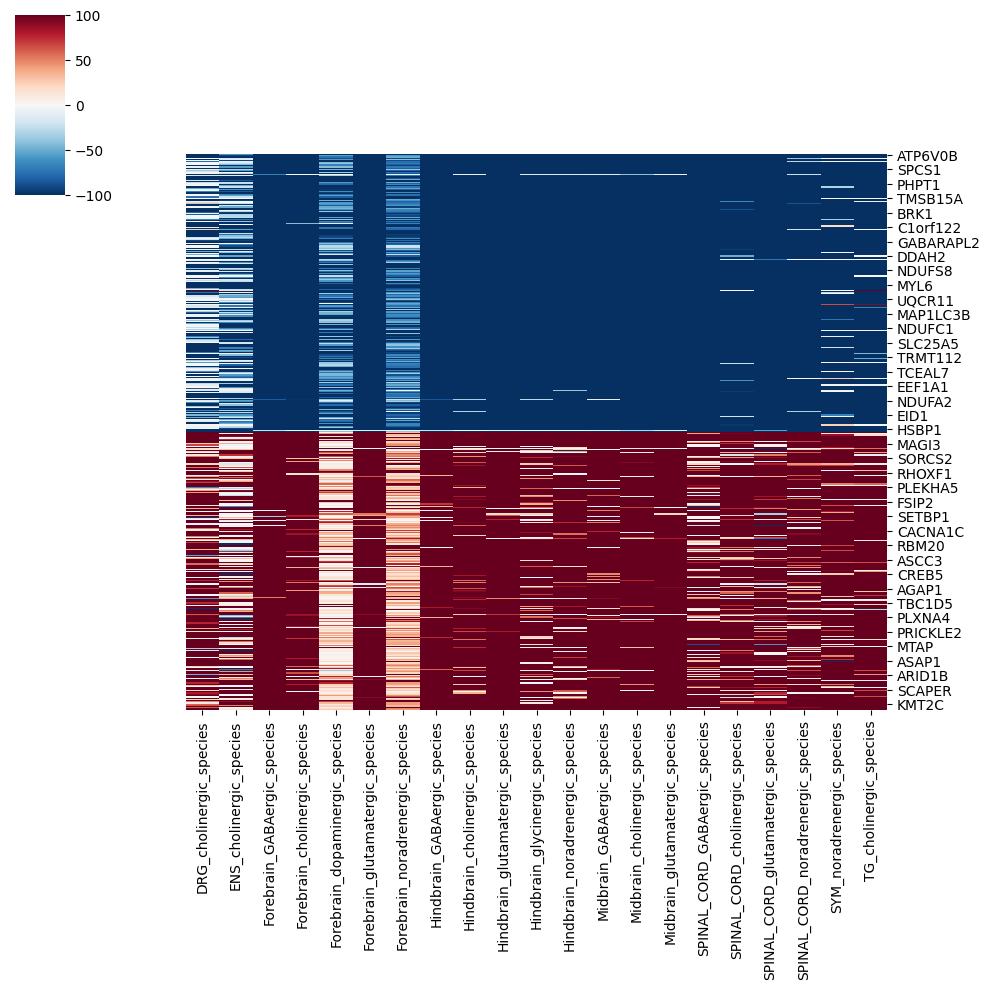

In [14]:
sns.clustermap(de_df_summary.loc[reg_genes],vmin=-100,vmax=100,cmap='RdBu_r',col_cluster=False,row_cluster=False)
plt.savefig("NT_comparison_top_250_up_down_prim_iNeurons.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.savefig("NT_comparison_top_250_up_down_prim_iNeurons.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

/cluster/home/jjanssens/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


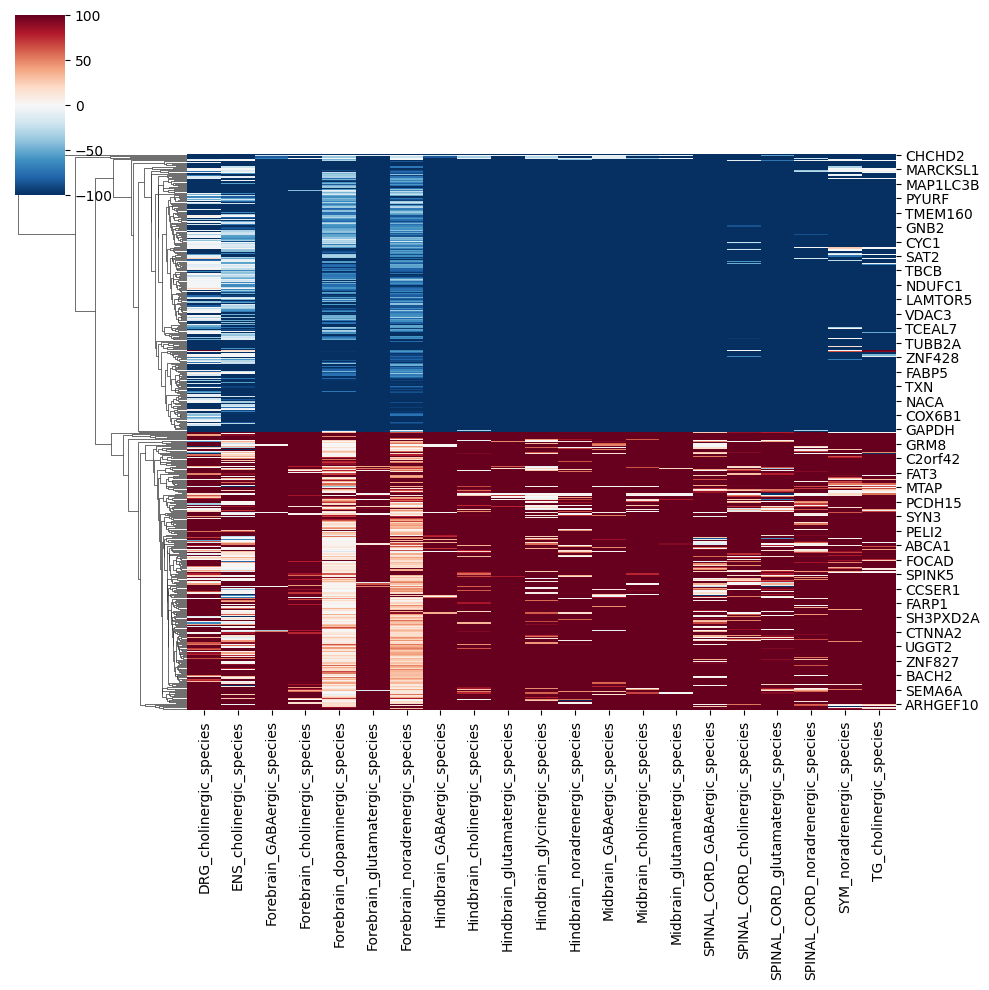

In [282]:
sns.clustermap(de_df_summary.loc[reg_genes],vmin=-100,vmax=100,cmap='RdBu_r',col_cluster=False)

In [283]:
!ls /cluster/home/jjanssens/jjans/resources/GO/gmt

c2.all.v2023.1.Hs.symbols.gmt  c8.all.v2023.1.Hs.symbols.gmt
c2.cgp.v2023.1.Hs.symbols.gmt  h.all.v2023.1.Hs.symbols.gmt
c5.hpo.v2023.1.Hs.symbols.gmt  origin.txt


In [284]:
with open('NT_comparison/DE_pos_genes.txt', 'w') as f:
    for line in pos_genes:
        f.write(f"{line}\n")

with open('NT_comparison/DE_neg_genes.txt', 'w') as f:
    for line in neg_genes:
        f.write(f"{line}\n")

In [24]:
de_summary_table = de_df_summary.loc[reg_genes]

In [26]:
de_summary_table.columns = [re.sub("_species","",x) for x in de_summary_table.columns]

In [28]:
de_summary_table['direction'] = 'unknown'
de_summary_table.loc[pos_genes,'direction'] = 'up'
de_summary_table.loc[neg_genes,'direction'] = 'down'

In [30]:
de_summary_table.to_csv("table_SX_DEGs.tsv",sep="\t")

In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scanpy as sc
import scanpy.external as sce
import gseapy as gp


In [19]:
bg_list = list(set(de_df_summary.index))

In [21]:
reference_genes = "/cluster/home/jjanssens/jjans/resources/GO/gmt/c2.all.v2023.1.Hs.symbols.gmt"
result = gp.enrichr(gene_list=pos_genes, 
                    gene_sets=reference_genes,background=bg_list)
result_df = result.res2d
result_df = result_df.sort_values(by='Adjusted P-value')
kegg_terms = [x for x in result_df['Term'] if 'KEGG' in x]
result_df = result_df.loc[result_df['Term'].isin(kegg_terms)]
result_df.head(n=30)

Gene_set  \
777  c2.all.v2023.1.Hs.symbols.gmt   
847  c2.all.v2023.1.Hs.symbols.gmt   
776  c2.all.v2023.1.Hs.symbols.gmt   
805  c2.all.v2023.1.Hs.symbols.gmt   
782  c2.all.v2023.1.Hs.symbols.gmt   
791  c2.all.v2023.1.Hs.symbols.gmt   
795  c2.all.v2023.1.Hs.symbols.gmt   
780  c2.all.v2023.1.Hs.symbols.gmt   
826  c2.all.v2023.1.Hs.symbols.gmt   
852  c2.all.v2023.1.Hs.symbols.gmt   
781  c2.all.v2023.1.Hs.symbols.gmt   
794  c2.all.v2023.1.Hs.symbols.gmt   
832  c2.all.v2023.1.Hs.symbols.gmt   
778  c2.all.v2023.1.Hs.symbols.gmt   
799  c2.all.v2023.1.Hs.symbols.gmt   
845  c2.all.v2023.1.Hs.symbols.gmt   
842  c2.all.v2023.1.Hs.symbols.gmt   
797  c2.all.v2023.1.Hs.symbols.gmt   
810  c2.all.v2023.1.Hs.symbols.gmt   
825  c2.all.v2023.1.Hs.symbols.gmt   
793  c2.all.v2023.1.Hs.symbols.gmt   
835  c2.all.v2023.1.Hs.symbols.gmt   
788  c2.all.v2023.1.Hs.symbols.gmt   
806  c2.all.v2023.1.Hs.symbols.gmt   
803  c2.all.v2023.1.Hs.symbols.gmt   
804  c2.all.v2023.1.Hs.symbols.gmt   
818  c2.all.v2023.1.Hs.symbols.gmt   
815  c2.all.v2023.1.Hs.symbols.gmt   
816  c2.all.v2023.1.Hs.symbols.gmt   
801  c2.all.v2023.1.Hs.symbols.gmt   

                                                  Term Overlap   P-value  \
777                                 KEGG_AXON_GUIDANCE  10/119  0.000038   
847                     KEGG_TYPE_II_DIABETES_MELLITUS    4/44  0.006663   
776  KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMY...    4/72  0.034927   
805  KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_AND_...    2/20  0.045326   
782                  KEGG_CELL_ADHESION_MOLECULES_CAMS   5/113  0.044823   
791                            KEGG_ENDOMETRIAL_CANCER    3/52  0.059416   
795              KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS    4/87  0.062200   
780                     KEGG_CALCIUM_SIGNALING_PATHWAY   6/164  0.063120   
826                    KEGG_NON_SMALL_CELL_LUNG_CANCER    3/54  0.065075   
852            KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION   4/101  0.095313   
781                    KEGG_CARDIAC_MUSCLE_CONTRACTION    3/71  0.122058   
794               KEGG_FC_EPSILON_RI_SIGNALING_PATHWAY    3/71  0.122058   
832         KEGG_PHOSPHATIDYLINOSITOL_SIGNALING_SYSTEM    3/73  0.129676   
778                                KEGG_BLADDER_CANCER    2/39  0.143567   
799                       KEGG_GLYCEROLIPID_METABOLISM    2/39  0.143567   
845                                KEGG_TIGHT_JUNCTION   4/121  0.153889   
842                             KEGG_SULFUR_METABOLISM    1/10  0.158689   
797                                  KEGG_GAP_JUNCTION    3/82  0.165863   
810               KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM    3/82  0.165863   
825                    KEGG_NON_HOMOLOGOUS_END_JOINING    1/11  0.173107   
793                        KEGG_ERBB_SIGNALING_PATHWAY    3/83  0.170055   
835                               KEGG_PROSTATE_CANCER    3/86  0.182810   
788                        KEGG_DILATED_CARDIOMYOPATHY    3/88  0.191451   
806                        KEGG_GNRH_SIGNALING_PATHWAY    3/88  0.191451   
803  KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SU...    1/13  0.201208   
804  KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SE...    1/15  0.228358   
818          KEGG_MATURITY_ONSET_DIABETES_OF_THE_YOUNG    1/18  0.267370   
815                          KEGG_LONG_TERM_DEPRESSION    2/60  0.274457   
816                        KEGG_LONG_TERM_POTENTIATION    2/60  0.274457   
801  KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITI...    1/22  0.316346   

     Adjusted P-value  Odds Ratio  Combined Score  \
777          0.005825    5.677470       57.845746   
847          0.192859    6.449628       32.320335   
776          0.398259    3.805822       12.766609   
805          0.447149    7.792974       24.110485   
782          0.447149    2.940402        9.130016   
791          0.489064    4.085155       11.533205   
795          0.499604    3.118862        8.662335   
780          0.500776    2.380142        6.575670   
826          

In [20]:
reference_genes = "/cluster/home/jjanssens/jjans/resources/GO/gmt/c2.all.v2023.1.Hs.symbols.gmt"
result = gp.enrichr(gene_list=neg_genes, 
                    gene_sets=reference_genes,background=bg_list)
result_df = result.res2d
result_df = result_df.sort_values(by='Adjusted P-value')
kegg_terms = [x for x in result_df['Term'] if 'KEGG' in x]
result_df = result_df.loc[result_df['Term'].isin(kegg_terms)]
result_df.head(n=30)

Gene_set  \
1002  c2.all.v2023.1.Hs.symbols.gmt   
979   c2.all.v2023.1.Hs.symbols.gmt   
999   c2.all.v2023.1.Hs.symbols.gmt   
946   c2.all.v2023.1.Hs.symbols.gmt   
957   c2.all.v2023.1.Hs.symbols.gmt   
1003  c2.all.v2023.1.Hs.symbols.gmt   
1024  c2.all.v2023.1.Hs.symbols.gmt   
1040  c2.all.v2023.1.Hs.symbols.gmt   
1016  c2.all.v2023.1.Hs.symbols.gmt   
1028  c2.all.v2023.1.Hs.symbols.gmt   
1015  c2.all.v2023.1.Hs.symbols.gmt   
977   c2.all.v2023.1.Hs.symbols.gmt   
974   c2.all.v2023.1.Hs.symbols.gmt   
1026  c2.all.v2023.1.Hs.symbols.gmt   
1020  c2.all.v2023.1.Hs.symbols.gmt   
1041  c2.all.v2023.1.Hs.symbols.gmt   
998   c2.all.v2023.1.Hs.symbols.gmt   
948   c2.all.v2023.1.Hs.symbols.gmt   
993   c2.all.v2023.1.Hs.symbols.gmt   
973   c2.all.v2023.1.Hs.symbols.gmt   
971   c2.all.v2023.1.Hs.symbols.gmt   
1018  c2.all.v2023.1.Hs.symbols.gmt   
961   c2.all.v2023.1.Hs.symbols.gmt   
967   c2.all.v2023.1.Hs.symbols.gmt   
988   c2.all.v2023.1.Hs.symbols.gmt   
945   c2.all.v2023.1.Hs.symbols.gmt   
955   c2.all.v2023.1.Hs.symbols.gmt   
1017  c2.all.v2023.1.Hs.symbols.gmt   
1025  c2.all.v2023.1.Hs.symbols.gmt   
947   c2.all.v2023.1.Hs.symbols.gmt   

                                                   Term Overlap       P-value  \
1002                            KEGG_PARKINSONS_DISEASE   38/93  3.246244e-43   
979                            KEGG_HUNTINGTONS_DISEASE  41/144  4.857825e-39   
999                      KEGG_OXIDATIVE_PHOSPHORYLATION   35/95  6.500512e-38   
946                             KEGG_ALZHEIMERS_DISEASE  35/135  8.444704e-32   
957                     KEGG_CARDIAC_MUSCLE_CONTRACTION   16/71  4.685598e-14   
1003         KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION    9/51  1.783003e-07   
1024                                      KEGG_RIBOSOME     3/3  4.963639e-06   
1040                     KEGG_VIBRIO_CHOLERAE_INFECTION    7/49  1.847558e-05   
1016                                KEGG_PROTEIN_EXPORT    5/21  2.301197e-05   
1028                                   KEGG_SPLICEOSOME  10/118  3.495360e-05   
1015                                    KEGG_PROTEASOME    6/40  5.596948e-05   
977                     KEGG_GLYCOLYSIS_GLUCONEOGENESIS    6/53  2.780231e-04   
974                                   KEGG_GAP_JUNCTION    7/82  5.065170e-04   
1026                                KEGG_RNA_POLYMERASE    4/25  8.002299e-04   
1020              KEGG_REGULATION_OF_ACTIN_CYTOSKELETON  10/196  2.053164e-03   
1041                             KEGG_VIRAL_MYOCARDITIS    5/60  3.590929e-03   
998                                 KEGG_OOCYTE_MEIOSIS    6/95  5.805643e-03   
948            KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION    4/50  1.043937e-02   
993                 KEGG_NEUROTROPHIN_SIGNALING_PATHWAY   6/115  1.420013e-02   
973                KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM    3/30  1.432701e-02   
971               KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS    5/87  1.677766e-02   
1018                         KEGG_PYRIMIDINE_METABOLISM    5/89  1.834076e-02   
961                              KEGG_COLORECTAL_CANCER    4/62  2.158706e-02   
967   KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER...    4/64  2.395034e-02   
988                         KEGG_MAPK_SIGNALING_PATHWAY   9/245  2.549408e-02   
945                              KEGG_ADHERENS_JUNCTION    4/67  2.777866e-02   
955              KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY    4/70  3.195164e-02   
1017                             KEGG_PURINE_METABOLISM   6/144  3.759053e-02   
1025                               KEGG_RNA_DEGRADATION    3/47  4.635063e-02   
947              KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS    3/49  5.138719e-02   

      Adjusted P-value  Odds Ratio  Combined Score  \
1002      2.749569e-40   46.660286     4564.946587   
979       2.743052e-36   27.264744     2405.301887   
999       2.447082e-35   38.905620     3331.346353   
946       1.907377e-29   23.355231     1671.047695   
957       3.691816e-12   18.121189 

In [44]:
reference_genes = "/cluster/home/jjanssens/jjans/resources/GO/gmt/c2.all.v2023.1.Hs.symbols.gmt"
result = gp.enrichr(gene_list=neg_genes, 
                    gene_sets=reference_genes,background=bg_list)
result_df = result.res2d
result_df = result_df.sort_values(by='Adjusted P-value')
kegg_terms = [x for x in result_df['Term'] if 'KEGG' in x]
result_df = result_df.loc[result_df['Term'].isin(kegg_terms)]
result_df.head(n=30)

Gene_set  \
983   c2.all.v2023.1.Hs.symbols.gmt   
963   c2.all.v2023.1.Hs.symbols.gmt   
980   c2.all.v2023.1.Hs.symbols.gmt   
934   c2.all.v2023.1.Hs.symbols.gmt   
944   c2.all.v2023.1.Hs.symbols.gmt   
984   c2.all.v2023.1.Hs.symbols.gmt   
1005  c2.all.v2023.1.Hs.symbols.gmt   
1020  c2.all.v2023.1.Hs.symbols.gmt   
997   c2.all.v2023.1.Hs.symbols.gmt   
1009  c2.all.v2023.1.Hs.symbols.gmt   
996   c2.all.v2023.1.Hs.symbols.gmt   
961   c2.all.v2023.1.Hs.symbols.gmt   
1007  c2.all.v2023.1.Hs.symbols.gmt   
1021  c2.all.v2023.1.Hs.symbols.gmt   
1001  c2.all.v2023.1.Hs.symbols.gmt   
936   c2.all.v2023.1.Hs.symbols.gmt   
958   c2.all.v2023.1.Hs.symbols.gmt   
957   c2.all.v2023.1.Hs.symbols.gmt   
955   c2.all.v2023.1.Hs.symbols.gmt   
999   c2.all.v2023.1.Hs.symbols.gmt   
947   c2.all.v2023.1.Hs.symbols.gmt   
979   c2.all.v2023.1.Hs.symbols.gmt   
952   c2.all.v2023.1.Hs.symbols.gmt   
933   c2.all.v2023.1.Hs.symbols.gmt   
998   c2.all.v2023.1.Hs.symbols.gmt   
1006  c2.all.v2023.1.Hs.symbols.gmt   
935   c2.all.v2023.1.Hs.symbols.gmt   
971   c2.all.v2023.1.Hs.symbols.gmt   
978   c2.all.v2023.1.Hs.symbols.gmt   
994   c2.all.v2023.1.Hs.symbols.gmt   

                                                   Term Overlap       P-value  \
983                             KEGG_PARKINSONS_DISEASE   38/93  3.246244e-43   
963                            KEGG_HUNTINGTONS_DISEASE  41/144  4.857825e-39   
980                      KEGG_OXIDATIVE_PHOSPHORYLATION   35/95  6.500512e-38   
934                             KEGG_ALZHEIMERS_DISEASE  35/135  8.444704e-32   
944                     KEGG_CARDIAC_MUSCLE_CONTRACTION   16/71  4.685598e-14   
984          KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION    8/51  2.229682e-06   
1005                                      KEGG_RIBOSOME     3/3  4.963639e-06   
1020                     KEGG_VIBRIO_CHOLERAE_INFECTION    7/49  1.847558e-05   
997                                 KEGG_PROTEIN_EXPORT    5/21  2.301197e-05   
1009                                   KEGG_SPLICEOSOME  10/118  3.495360e-05   
996                                     KEGG_PROTEASOME    6/40  5.596948e-05   
961                     KEGG_GLYCOLYSIS_GLUCONEOGENESIS    6/53  2.780231e-04   
1007                                KEGG_RNA_POLYMERASE    4/25  8.002299e-04   
1021                             KEGG_VIRAL_MYOCARDITIS    5/60  3.590929e-03   
1001              KEGG_REGULATION_OF_ACTIN_CYTOSKELETON   9/196  6.716188e-03   
936            KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION    4/50  1.043937e-02   
958                                   KEGG_GAP_JUNCTION    5/82  1.326389e-02   
957                KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM    3/30  1.432701e-02   
955               KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS    5/87  1.677766e-02   
999                          KEGG_PYRIMIDINE_METABOLISM    5/89  1.834076e-02   
947                              KEGG_COLORECTAL_CANCER    4/62  2.158706e-02   
979                                 KEGG_OOCYTE_MEIOSIS    5/95  2.359676e-02   
952   KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER...    4/64  2.395034e-02   
933                              KEGG_ADHERENS_JUNCTION    4/67  2.777866e-02   
998                              KEGG_PURINE_METABOLISM   6/144  3.759053e-02   
1006                               KEGG_RNA_DEGRADATION    3/47  4.635063e-02   
935              KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS    3/49  5.138719e-02   
971                         KEGG_MAPK_SIGNALING_PATHWAY   8/245  6.039093e-02   
978                         KEGG_OLFACTORY_TRANSDUCTION    2/25  6.771445e-02   
994                          KEGG_PROPANOATE_METABOLISM    2/30  9.293875e-02   

      Adjusted P-value  Odds Ratio  Combined Score  \
983       2.676528e-40   46.660286     4564.946587   
963       2.670184e-36   27.264744     2405.301887   
980       2.382077e-35   38.905620     3331.346353   
934       1.856709e-29   23.355231     1671.047695   
944       3.769050e-12   18.121189 

In [350]:
reference_genes = "/cluster/home/jjanssens/jjans/resources/GO/gmt/c2.all.v2023.1.Hs.symbols.gmt"
result = gp.enrichr(gene_list=neg_genes, 
                    gene_sets=reference_genes,background=bg_list)
result_df = result.res2d
result_df = result_df.sort_values(by='Adjusted P-value')
kegg_terms = [x for x in result_df['Term'] if 'KEGG' in x]
result_df = result_df.loc[result_df['Term'].isin(kegg_terms)]
result_df.head(n=30)

Gene_set  \
983   c2.all.v2023.1.Hs.symbols.gmt   
963   c2.all.v2023.1.Hs.symbols.gmt   
980   c2.all.v2023.1.Hs.symbols.gmt   
934   c2.all.v2023.1.Hs.symbols.gmt   
944   c2.all.v2023.1.Hs.symbols.gmt   
984   c2.all.v2023.1.Hs.symbols.gmt   
1005  c2.all.v2023.1.Hs.symbols.gmt   
1020  c2.all.v2023.1.Hs.symbols.gmt   
997   c2.all.v2023.1.Hs.symbols.gmt   
1009  c2.all.v2023.1.Hs.symbols.gmt   
996   c2.all.v2023.1.Hs.symbols.gmt   
961   c2.all.v2023.1.Hs.symbols.gmt   
1007  c2.all.v2023.1.Hs.symbols.gmt   
1021  c2.all.v2023.1.Hs.symbols.gmt   
1001  c2.all.v2023.1.Hs.symbols.gmt   
936   c2.all.v2023.1.Hs.symbols.gmt   
958   c2.all.v2023.1.Hs.symbols.gmt   
957   c2.all.v2023.1.Hs.symbols.gmt   
955   c2.all.v2023.1.Hs.symbols.gmt   
999   c2.all.v2023.1.Hs.symbols.gmt   
947   c2.all.v2023.1.Hs.symbols.gmt   
979   c2.all.v2023.1.Hs.symbols.gmt   
952   c2.all.v2023.1.Hs.symbols.gmt   
933   c2.all.v2023.1.Hs.symbols.gmt   
998   c2.all.v2023.1.Hs.symbols.gmt   
1006  c2.all.v2023.1.Hs.symbols.gmt   
935   c2.all.v2023.1.Hs.symbols.gmt   
971   c2.all.v2023.1.Hs.symbols.gmt   
978   c2.all.v2023.1.Hs.symbols.gmt   
994   c2.all.v2023.1.Hs.symbols.gmt   

                                                   Term Overlap       P-value  \
983                             KEGG_PARKINSONS_DISEASE   38/93  3.246244e-43   
963                            KEGG_HUNTINGTONS_DISEASE  41/144  4.857825e-39   
980                      KEGG_OXIDATIVE_PHOSPHORYLATION   35/95  6.500512e-38   
934                             KEGG_ALZHEIMERS_DISEASE  35/135  8.444704e-32   
944                     KEGG_CARDIAC_MUSCLE_CONTRACTION   16/71  4.685598e-14   
984          KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION    8/51  2.229682e-06   
1005                                      KEGG_RIBOSOME     3/3  4.963639e-06   
1020                     KEGG_VIBRIO_CHOLERAE_INFECTION    7/49  1.847558e-05   
997                                 KEGG_PROTEIN_EXPORT    5/21  2.301197e-05   
1009                                   KEGG_SPLICEOSOME  10/118  3.495360e-05   
996                                     KEGG_PROTEASOME    6/40  5.596948e-05   
961                     KEGG_GLYCOLYSIS_GLUCONEOGENESIS    6/53  2.780231e-04   
1007                                KEGG_RNA_POLYMERASE    4/25  8.002299e-04   
1021                             KEGG_VIRAL_MYOCARDITIS    5/60  3.590929e-03   
1001              KEGG_REGULATION_OF_ACTIN_CYTOSKELETON   9/196  6.716188e-03   
936            KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION    4/50  1.043937e-02   
958                                   KEGG_GAP_JUNCTION    5/82  1.326389e-02   
957                KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM    3/30  1.432701e-02   
955               KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS    5/87  1.677766e-02   
999                          KEGG_PYRIMIDINE_METABOLISM    5/89  1.834076e-02   
947                              KEGG_COLORECTAL_CANCER    4/62  2.158706e-02   
979                                 KEGG_OOCYTE_MEIOSIS    5/95  2.359676e-02   
952   KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER...    4/64  2.395034e-02   
933                              KEGG_ADHERENS_JUNCTION    4/67  2.777866e-02   
998                              KEGG_PURINE_METABOLISM   6/144  3.759053e-02   
1006                               KEGG_RNA_DEGRADATION    3/47  4.635063e-02   
935              KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS    3/49  5.138719e-02   
971                         KEGG_MAPK_SIGNALING_PATHWAY   8/245  6.039093e-02   
978                         KEGG_OLFACTORY_TRANSDUCTION    2/25  6.771445e-02   
994                          KEGG_PROPANOATE_METABOLISM    2/30  9.293875e-02   

      Adjusted P-value  Odds Ratio  Combined Score  \
983       2.675717e-40   46.660286     4564.946587   
963       2.669375e-36   27.264744     2405.301887   
980       2.679024e-35   38.905620     3331.346353   
934       1.988728e-29   23.355231     1671.047695   
944       3.767907e-12   18.121189 

In [352]:
result_df_neg_plot = result_df.loc[result_df['Term'].isin(['KEGG_OXIDATIVE_PHOSPHORYLATION','KEGG_RIBOSOME','KEGG_PROTEIN_EXPORT'])]

In [354]:
reference_genes = "/cluster/home/jjanssens/jjans/resources/GO/gmt/c2.all.v2023.1.Hs.symbols.gmt"
result = gp.enrichr(gene_list=pos_genes, 
                    gene_sets=reference_genes,background=bg_list)
result_df = result.res2d
result_df = result_df.sort_values(by='Adjusted P-value')
kegg_terms = [x for x in result_df['Term'] if 'KEGG' in x]
result_df = result_df.loc[result_df['Term'].isin(kegg_terms)]
result_df_pos_plot = result_df.loc[result_df['Term'].isin(['KEGG_AXON_GUIDANCE'])]
result_df.head(n=30)



Gene_set  \
769  c2.all.v2023.1.Hs.symbols.gmt   
837  c2.all.v2023.1.Hs.symbols.gmt   
768  c2.all.v2023.1.Hs.symbols.gmt   
797  c2.all.v2023.1.Hs.symbols.gmt   
774  c2.all.v2023.1.Hs.symbols.gmt   
801  c2.all.v2023.1.Hs.symbols.gmt   
783  c2.all.v2023.1.Hs.symbols.gmt   
787  c2.all.v2023.1.Hs.symbols.gmt   
780  c2.all.v2023.1.Hs.symbols.gmt   
817  c2.all.v2023.1.Hs.symbols.gmt   
772  c2.all.v2023.1.Hs.symbols.gmt   
841  c2.all.v2023.1.Hs.symbols.gmt   
831  c2.all.v2023.1.Hs.symbols.gmt   
773  c2.all.v2023.1.Hs.symbols.gmt   
786  c2.all.v2023.1.Hs.symbols.gmt   
823  c2.all.v2023.1.Hs.symbols.gmt   
770  c2.all.v2023.1.Hs.symbols.gmt   
791  c2.all.v2023.1.Hs.symbols.gmt   
835  c2.all.v2023.1.Hs.symbols.gmt   
832  c2.all.v2023.1.Hs.symbols.gmt   
785  c2.all.v2023.1.Hs.symbols.gmt   
816  c2.all.v2023.1.Hs.symbols.gmt   
789  c2.all.v2023.1.Hs.symbols.gmt   
826  c2.all.v2023.1.Hs.symbols.gmt   
798  c2.all.v2023.1.Hs.symbols.gmt   
795  c2.all.v2023.1.Hs.symbols.gmt   
796  c2.all.v2023.1.Hs.symbols.gmt   
809  c2.all.v2023.1.Hs.symbols.gmt   
806  c2.all.v2023.1.Hs.symbols.gmt   
781  c2.all.v2023.1.Hs.symbols.gmt   

                                                  Term Overlap   P-value  \
769                                 KEGG_AXON_GUIDANCE  11/119  0.000006   
837                     KEGG_TYPE_II_DIABETES_MELLITUS    4/44  0.006663   
768  KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMY...    5/72  0.007799   
797  KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_AND_...    2/20  0.045326   
774                  KEGG_CELL_ADHESION_MOLECULES_CAMS   5/113  0.044823   
801               KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM    4/82  0.052140   
783                            KEGG_ENDOMETRIAL_CANCER    3/52  0.059416   
787              KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS    4/87  0.062200   
780                        KEGG_DILATED_CARDIOMYOPATHY    4/88  0.064326   
817                    KEGG_NON_SMALL_CELL_LUNG_CANCER    3/54  0.065075   
772                     KEGG_CALCIUM_SIGNALING_PATHWAY   6/164  0.063120   
841            KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION   4/101  0.095313   
831     KEGG_SNARE_INTERACTIONS_IN_VESICULAR_TRANSPORT    2/33  0.109174   
773                    KEGG_CARDIAC_MUSCLE_CONTRACTION    3/71  0.122058   
786               KEGG_FC_EPSILON_RI_SIGNALING_PATHWAY    3/71  0.122058   
823         KEGG_PHOSPHATIDYLINOSITOL_SIGNALING_SYSTEM    3/73  0.129676   
770                                KEGG_BLADDER_CANCER    2/39  0.143567   
791                       KEGG_GLYCEROLIPID_METABOLISM    2/39  0.143567   
835                                KEGG_TIGHT_JUNCTION   4/121  0.153889   
832                             KEGG_SULFUR_METABOLISM    1/10  0.158689   
785                        KEGG_ERBB_SIGNALING_PATHWAY    3/83  0.170055   
816                    KEGG_NON_HOMOLOGOUS_END_JOINING    1/11  0.173107   
789                                  KEGG_GAP_JUNCTION    3/82  0.165863   
826                               KEGG_PROSTATE_CANCER    3/86  0.182810   
798                        KEGG_GNRH_SIGNALING_PATHWAY    3/88  0.191451   
795  KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SU...    1/13  0.201208   
796  KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SE...    1/15  0.228358   
809          KEGG_MATURITY_ONSET_DIABETES_OF_THE_YOUNG    1/18  0.267370   
806                          KEGG_LONG_TERM_DEPRESSION    2/60  0.274457   
781                  KEGG_DORSO_VENTRAL_AXIS_FORMATION    1/22  0.316346   

     Adjusted P-value  Odds Ratio  Combined Score  \
769          0.001794    6.302137       75.603187   
837          0.202832    6.449628       32.320335   
768          0.214177    4.740032       23.006739   
797          0.494431    7.792974       24.110485   
774          0.494431    2.940402        9.130016   
801          0.520477    3.318678        9.802757   
783          0.532705    4.085155       11.533205   
787          0.544746    3.118862        8.662335   
780          

In [356]:
result_df_plot_bars = pd.concat([result_df_neg_plot,result_df_pos_plot])

In [358]:
result_df_plot_bars['-logp'] = -np.log10(result_df_plot_bars['Adjusted P-value'])

In [362]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

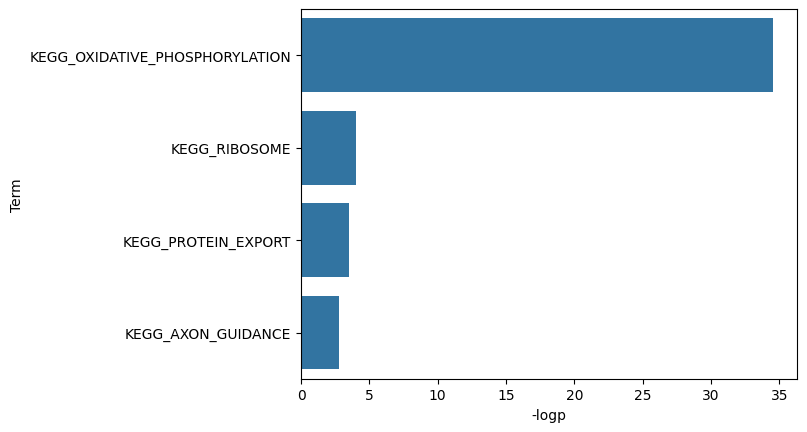

In [363]:
sns.barplot(data=result_df_plot_bars,y='Term',x='-logp')
plt.savefig("NT_comparison_DE_top_250_GO.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
plt.savefig("NT_comparison_DE_top_250_GO.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [359]:
result_df_plot_bars.

Gene_set                            Term Overlap  \
980   c2.all.v2023.1.Hs.symbols.gmt  KEGG_OXIDATIVE_PHOSPHORYLATION   35/95   
1005  c2.all.v2023.1.Hs.symbols.gmt                   KEGG_RIBOSOME     3/3   
997   c2.all.v2023.1.Hs.symbols.gmt             KEGG_PROTEIN_EXPORT    5/21   
769   c2.all.v2023.1.Hs.symbols.gmt              KEGG_AXON_GUIDANCE  11/119   

           P-value  Adjusted P-value  Odds Ratio  Combined Score  \
980   6.500512e-38      2.679024e-35   38.905620     3331.346353   
1005  4.963639e-06      9.142524e-05  405.816162     4956.383484   
997   2.301197e-05      3.298716e-04   19.460285      207.826039   
769   6.166143e-06      1.793662e-03    6.302137       75.603187   

                                                  Genes      -logp  
980   CYC1;ATP6V1F;COX7B;NDUFC1;COX7A2L;NDUFS6;NDUFS...  34.572023  
1005                                  UBA52;FAU;RSL24D1   4.038934  
997                      SPCS1;SRP9;SEC61B;SEC61G;SRP14   3.481655  
769   SLIT3;SEMA3E;SEMA6A;ROBO1;SEMA3A;PLXNA2;EFNA5;...   2.746259

In [34]:
reference_genes = "/cluster/home/jjanssens/jjans/resources/GO/gmt/c2.all.v2023.1.Hs.symbols.gmt"
result = gp.enrichr(gene_list=neg_genes, 
                    gene_sets=reference_genes,background=bg_list)
result_df = result.res2d
result_df = result_df.sort_values(by='Adjusted P-value')
kegg_terms = [x for x in result_df['Term'] if 'KEGG' in x]
result_df = result_df.loc[result_df['Term'].isin(kegg_terms)]
result_df.head()

Gene_set                             Term Overlap  \
622  c2.all.v2023.1.Hs.symbols.gmt   KEGG_OXIDATIVE_PHOSPHORYLATION   19/95   
623  c2.all.v2023.1.Hs.symbols.gmt          KEGG_PARKINSONS_DISEASE   16/93   
614  c2.all.v2023.1.Hs.symbols.gmt         KEGG_HUNTINGTONS_DISEASE  18/144   
595  c2.all.v2023.1.Hs.symbols.gmt          KEGG_ALZHEIMERS_DISEASE  16/135   
602  c2.all.v2023.1.Hs.symbols.gmt  KEGG_CARDIAC_MUSCLE_CONTRACTION   11/71   

          P-value  Adjusted P-value  Odds Ratio  Combined Score  \
622  3.705708e-23      2.595231e-20   45.108264     2329.823028   
623  1.671460e-18      3.192489e-16   36.335904     1487.331519   
614  4.072118e-18      6.581170e-16   25.477662     1020.185925   
595  8.049668e-16      1.057022e-13   23.496497      816.637913   
602  1.617357e-12      1.544576e-10   30.664897      832.558929   

                                                 Genes  
622  ATP6V1F;COX7B;NDUFS5;NDUFA4;COX7A2;COX6B1;NDUF...  
623  COX6B1;NDUFB7;UQCRB;NDUFA1;COX7B;COX6C;NDUFS5;...  
614  COX6B1;NDUFB7;UQCRB;POLR2L;SOD1;NDUFA1;COX7B;C...  
595  COX6B1;NDUFB7;UQCRB;GAPDH;NDUFA1;COX7B;COX6C;N...  
602  COX6B1;UQCRB;COX7B;COX6C;UQCRH;UQCRQ;UQCR10;UQ...

In [35]:
result_df.head(n=30)

Gene_set  \
622  c2.all.v2023.1.Hs.symbols.gmt   
623  c2.all.v2023.1.Hs.symbols.gmt   
614  c2.all.v2023.1.Hs.symbols.gmt   
595  c2.all.v2023.1.Hs.symbols.gmt   
602  c2.all.v2023.1.Hs.symbols.gmt   
624  c2.all.v2023.1.Hs.symbols.gmt   
646  c2.all.v2023.1.Hs.symbols.gmt   
636  c2.all.v2023.1.Hs.symbols.gmt   
611  c2.all.v2023.1.Hs.symbols.gmt   
631  c2.all.v2023.1.Hs.symbols.gmt   
607  c2.all.v2023.1.Hs.symbols.gmt   
638  c2.all.v2023.1.Hs.symbols.gmt   
629  c2.all.v2023.1.Hs.symbols.gmt   
634  c2.all.v2023.1.Hs.symbols.gmt   
613  c2.all.v2023.1.Hs.symbols.gmt   
647  c2.all.v2023.1.Hs.symbols.gmt   
594  c2.all.v2023.1.Hs.symbols.gmt   
600  c2.all.v2023.1.Hs.symbols.gmt   
625  c2.all.v2023.1.Hs.symbols.gmt   
615  c2.all.v2023.1.Hs.symbols.gmt   
626  c2.all.v2023.1.Hs.symbols.gmt   
608  c2.all.v2023.1.Hs.symbols.gmt   
605  c2.all.v2023.1.Hs.symbols.gmt   
633  c2.all.v2023.1.Hs.symbols.gmt   
635  c2.all.v2023.1.Hs.symbols.gmt   
627  c2.all.v2023.1.Hs.symbols.gmt   
618  c2.all.v2023.1.Hs.symbols.gmt   
640  c2.all.v2023.1.Hs.symbols.gmt   
610  c2.all.v2023.1.Hs.symbols.gmt   
639  c2.all.v2023.1.Hs.symbols.gmt   

                                                  Term Overlap       P-value  \
622                     KEGG_OXIDATIVE_PHOSPHORYLATION   19/95  3.705708e-23   
623                            KEGG_PARKINSONS_DISEASE   16/93  1.671460e-18   
614                           KEGG_HUNTINGTONS_DISEASE  18/144  4.072118e-18   
595                            KEGG_ALZHEIMERS_DISEASE  16/135  8.049668e-16   
602                    KEGG_CARDIAC_MUSCLE_CONTRACTION   11/71  1.617357e-12   
624         KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION    7/51  5.177741e-08   
646                     KEGG_VIBRIO_CHOLERAE_INFECTION    6/49  9.787359e-07   
636                                      KEGG_RIBOSOME     2/3  1.387558e-04   
611                                  KEGG_GAP_JUNCTION    5/82  2.451695e-04   
631                                KEGG_PROTEIN_EXPORT    2/21  8.962957e-03   
607  KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER...    3/64  9.607215e-03   
638                                KEGG_RNA_POLYMERASE    2/25  1.257890e-02   
629                                KEGG_PRION_DISEASES    2/31  1.898626e-02   
634              KEGG_REGULATION_OF_ACTIN_CYTOSKELETON   4/196  4.569340e-02   
613                    KEGG_GLYCOLYSIS_GLUCONEOGENESIS    2/53  5.108113e-02   
647                             KEGG_VIRAL_MYOCARDITIS    2/60  6.364078e-02   
594                             KEGG_ADHERENS_JUNCTION    2/67  7.711771e-02   
600  KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMY...    2/72  8.724331e-02   
625                                    KEGG_PEROXISOME    2/77  9.774138e-02   
615               KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM    2/82  1.085758e-01   
626                      KEGG_PHENYLALANINE_METABOLISM    1/17  1.103430e-01   
608              KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS    2/87  1.197124e-01   
605                        KEGG_DILATED_CARDIOMYOPATHY    2/88  1.219731e-01   
633                         KEGG_PYRIMIDINE_METABOLISM    2/89  1.242443e-01   
635                       KEGG_REGULATION_OF_AUTOPHAGY    1/20  1.285235e-01   
627          KEGG_PORPHYRIN_AND_CHLOROPHYLL_METABOLISM    1/22  1.404389e-01   
618          KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION   2/106  1.642400e-01   
640                            KEGG_TASTE_TRANSDUCTION    1/27  1.695265e-01   
610               KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM    1/30  1.865091e-01   
639                                   KEGG_SPLICEOSOME   2/118  1.936719e-01   

     Adjusted P-value  Odds Ratio  Combined Score  \
622      2.595231e-20   45.108264     2329.823028   
623      3.192489e-16   36.335904     1487.331519   
614      6.581170e-16   25.477662     1020.185925   
595      1.057022e-13   23.496497      816.637913   
602      1.544576e-10   30.664897      832.558929   
624      2.472371e-06   26.055098      437.10845